## Garanti Data Camp

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns


from tqdm.notebook import tqdm
tqdm.pandas()

SEED = 42

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

cat_feat_colors = ["#d7e1ee", "#cbd6e4", "#bfcbdb", "#b3bfd1", "#a4a2a8", "#df8879", "#c86558", "#b04238", "#991f17"]
colors = ['#FFB6B9', '#FAE3D9', '#BBDED6', '#61C0BF', "#CCA8E9", "#F67280"]

In [2]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=False)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Total Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df).sort_values(by="Ratio", ascending=False)
    return missing_df


def check_df(dataframe, head=5, tail=5):
    print("*" * 70)
    print(" Shape ".center(70, "*"))
    print("*" * 70)
    print(dataframe.shape)

    print("*" * 70)
    print(" Types ".center(70, "*"))
    print("*" * 70)
    print(dataframe.dtypes)

    print("*" * 70)
    print(" Head ".center(70, "*"))
    print("*" * 70)
    print(dataframe.head(head))

    print("*" * 70)
    print(" Tail ".center(70, "*"))
    print("*" * 70)
    print(dataframe.tail(tail))

    print("*" * 70)
    print(" NA ".center(70, "*"))
    print("*" * 70)
    print(missing_values_analysis(dataframe))

    print("*" * 70)
    print(" Quantiles ".center(70, "*"))
    print("*" * 70)
    print(dataframe.describe([.01, .05, .1, .5, .9, .95, .99]).T)

    print("*" * 70)
    print(" Duplicate Rows ".center(70, "*"))
    print("*" * 70)
    print(dataframe.duplicated().sum())

    print("*" * 70)
    print(" Uniques ".center(70, "*"))
    print("*" * 70)
    print(dataframe.nunique())

In [3]:
def cat_plots(dataframe, cat_col):
    print("".center(100, "#"))
    print(dataframe[cat_col].value_counts())
    print("".center(100, "#"))

    plt.figure(figsize=(15, 10))
    sns.set_style("whitegrid")
    plt.suptitle(cat_col.capitalize(), size=16)
    plt.subplot(1, 3, 1)
    plt.title("Percentages")
    plt.pie(dataframe[cat_col].value_counts().values.tolist(),
            labels=dataframe[cat_col].value_counts().keys().tolist(),
            labeldistance=1.1,
            wedgeprops={'linewidth': 3, 'edgecolor': 'white'},
            colors=colors,
            autopct='%1.0f%%')

    

    plt.subplot(1, 3, 2)
    plt.title("Countplot")
    sns.countplot(data=dataframe, x=cat_col, palette=colors)
    plt.tight_layout(pad=3)

In [143]:
train = pd.read_csv("./data/train_users.csv")

In [129]:
test = pd.read_csv("./data/test_users.csv")

In [8]:
check_df(train)

**********************************************************************
******************************* Shape ********************************
**********************************************************************
(53019, 4)
**********************************************************************
******************************* Types ********************************
**********************************************************************
user_id              int64
industry            object
location            object
moved_after_2019     int64
dtype: object
**********************************************************************
******************************** Head ********************************
**********************************************************************
   user_id                             industry                    location  \
0     1301  Information Technology and Services  Istanbul, Istanbul, Turkey   
1     6950                             Internet  Istanbul, Istanbul, T

In [130]:
check_df(test)

**********************************************************************
******************************* Shape ********************************
**********************************************************************
(13255, 3)
**********************************************************************
******************************* Types ********************************
**********************************************************************
user_id      int64
industry    object
location    object
dtype: object
**********************************************************************
******************************** Head ********************************
**********************************************************************
   user_id                             industry                    location
0    17449                             Research                      Turkey
1    33967                    Computer Software  Istanbul, Istanbul, Turkey
2     2110                           Automotive    

In [10]:
train.head()

,user_id,industry,location,moved_after_2019
0,1301,Information Technology and Services,"Istanbul, Istanbul, Turkey",1
1,6950,Internet,"Istanbul, Istanbul, Turkey",0
2,4880,Online Media,Turkey,0
3,26046,Telecommunications,"Istanbul, Istanbul, Turkey",0
4,11005,Banking,"Istanbul, Turkey",0


####################################################################################################
0    32496
1    20523
Name: moved_after_2019, dtype: int64
####################################################################################################


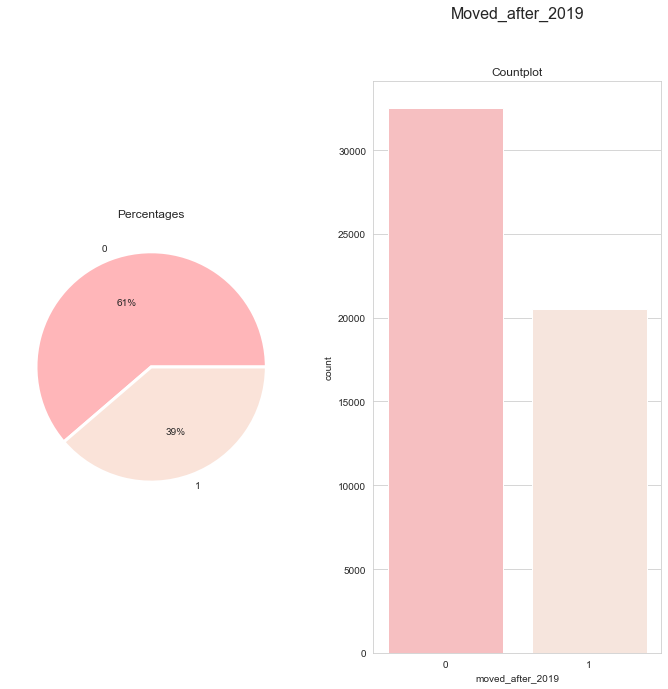

In [ ]:
cat_plots(train, "moved_after_2019")

## Raw train-test data

In [ ]:
train_raw = pd.read_csv("./data/train_users.csv")
test_raw = pd.read_csv("./data/test_users.csv")

In [ ]:
app_train_raw = pd.get_dummies(train_raw)
app_test_raw = pd.get_dummies(test_raw)

print('Training Features shape: ', app_train_raw.shape)
print('Testing Features shape: ', app_test_raw.shape)

Training Features shape:  (53019, 563)
Testing Features shape:  (13255, 388)


In [ ]:
labels = app_train_raw["moved_after_2019"]

app_train_raw, app_test_raw = app_train_raw.align(app_test_raw, join = 'inner', axis = 1)

app_train_raw['moved_after_2019'] = labels

print('Training Features shape: ', app_train_raw.shape)
print('Testing Features shape: ', app_test_raw.shape)

Training Features shape:  (53019, 364)
Testing Features shape:  (13255, 363)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

if 'moved_after_2019' in app_train_raw:
    train = app_train_raw.drop(columns = ['moved_after_2019'])
else:
    train = app_train_raw.copy()
    
features = list(train.columns)

test = app_test_raw.copy()

imputer = SimpleImputer(strategy = 'median')
scaler = MinMaxScaler(feature_range = (0, 1))

imputer.fit(train)


train = imputer.transform(train)
test = imputer.transform(app_test_raw)


scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (53019, 363)
Testing data shape:  (13255, 363)


In [ ]:
X = app_train_raw.drop(["moved_after_2019"], axis=1)
y = labels

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)

In [ ]:
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression(C = 0.0001, random_state=SEED)


log_reg.fit(X_train, y_train)

LogisticRegression(C=0.0001, random_state=42)

In [ ]:
y_pred_test = log_reg.predict(X_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.6105


## Location feature eng

In [15]:
province={
"1.0" : "Adana",
"2.0" : "Adıyaman",
"3.0" : "Afyonkarahisar",
"4.0" : "Ağrı",
"5.0" : "Amasya",
"6.0" : "Ankara",
"7.0" : "Antalya",
"8.0" : "Artvin",
"9.0" : "Aydın",
"10.0" : "Balıkesir",
"11.0" : "Bilecik",
"12.0" : "Bingöl",
"13.0" : "Bitlis",
"14.0" : "Bolu",
"15.0" : "Burdur",
"16.0" : "Bursa",
"17.0" : "Çanakkale",
"18.0" : "Çankırı",
"19.0" : "Çorum",
"20.0" : "Denizli",
"21.0" : "Diyarbakır",
"22.0" : "Edirne",
"23.0" : "Elâzığ",
"24.0" : "Erzincan",
"25.0" : "Erzurum",
"26.0" : "Eskişehir",
"27.0" : "Gaziantep",
"28.0" : "Giresun",
"29.0" : "Gümüşhane",
"30.0" : "Hakkâri",
"31.0" : "Hatay",
"32.0" : "Isparta",
"33.0" : "Mersin",
"34.0" : "İstanbul",
"35.0" : "İzmir",
"36.0" : "Kars",
"37.0" : "Kastamonu",
"38.0" : "Kayseri",
"39.0" : "Kırklareli",
"40.0" : "Kırşehir",
"41.0" : "Kocaeli",
"42.0" : "Konya",
"43.0" : "Kütahya",
"44.0" : "Malatya",
"45.0" : "Manisa",
"46.0" : "Kahramanmaraş",
"47.0" : "Mardin",
"48.0" : "Muğla",
"49.0" : "Muş",
"50.0" : "Nevşehir",
"51.0" : "Niğde",
"52.0" : "Ordu",
"53.0" : "Rize",
"54.0" : "Sakarya",
"55.0" : "Samsun",
"56.0" : "Siirt",
"57.0" : "Sinop",
"58.0" : "Sivas",
"59.0" : "Tekirdağ",
"60.0" : "Tokat",
"61.0" : "Trabzon",
"62.0" : "Tunceli",
"63.0" : "Şanlıurfa",
"64.0" : "Uşak",
"65.0" : "Van",
"66.0" : "Yozgat",
"67.0" : "Zonguldak",
"68.0" : "Aksaray",
"69.0" : "Bayburt",
"70.0" : "Karaman",
"71.0" : "Kırıkkale",
"72.0" : "Batman",
"73.0" : "Şırnak",
"74.0" : "Bartın",
"75.0" : "Ardahan",
"76.0" : "Iğdır",
"77.0" : "Yalova",
"78.0" : "Karabük",
"79.0" : "Kilis",
"80.0" : "Osmaniye",
"81.0" : "Düzce"
}


In [17]:
import swifter
from unidecode import unidecode

def check_string(string_to_check):
    string_to_check = unidecode(str(string_to_check).lower())
    if "," in string_to_check:
        sub = string_to_check.split(", ")
    else:
        sub = string_to_check.split()

    sub_dict = dict((v,unidecode(k.lower())) for v, k in province.items())

    for val in sub:
        if val in sub_dict.values():
            return val
        else:
            continue
    return val


#df['result'] = df['string_to_check'].apply(check_string)

In [144]:
train["user_location"] = train["location"].swifter.apply(check_string)

Pandas Apply:   0%|          | 0/53019 [00:00<?, ?it/s]

In [135]:
test["user_location"] = test["location"].swifter.apply(check_string)

Pandas Apply:   0%|          | 0/13255 [00:00<?, ?it/s]

In [145]:
train["user_location"] = train["user_location"].replace(['kingdom','states'],['united kingdom', 'united states'])


In [147]:
test["user_location"] = test["user_location"].replace(['kingdom','states'],['united kingdom', 'united states'])


In [149]:
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

industry         141
location         420
user_location     94
dtype: int64

In [150]:
test.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

industry         128
location         259
user_location     64
dtype: int64

In [152]:
train.drop(columns="location", inplace=True)
test.drop(columns="location", inplace=True)

In [153]:
app_train = pd.get_dummies(train)
app_test = pd.get_dummies(test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (53019, 237)
Testing Features shape:  (13255, 193)


In [155]:
labels = app_train["moved_after_2019"]

app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

app_train['moved_after_2019'] = labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (53019, 194)
Testing Features shape:  (13255, 193)


In [157]:
correlations = app_train.corr()['moved_after_2019'].sort_values()


print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 industry_Fine Art                               0.009466
industry_Financial Services                     0.010671
user_location_philippines                       0.012220
industry_Think Tanks                            0.012306
industry_Higher Education                       0.012504
industry_Restaurants                            0.013197
user_location_ankara                            0.015855
industry_Entertainment                          0.017716
industry_Aviation & Aerospace                   0.019422
industry_Political Organization                 0.020450
industry_Defense & Space                        0.029694
industry_Information Technology and Services    0.036407
industry_Internet                               0.037546
user_location_istanbul                          0.068572
moved_after_2019                                1.000000
Name: moved_after_2019, dtype: float64

Most Negative Correlations:
 user_location_turkey                           

In [160]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

if 'moved_after_2019' in app_train:
    train = app_train.drop(columns = ['moved_after_2019'])
else:
    train = app_train.copy()
    

features = list(train.columns)


test = app_test.copy()


imputer = SimpleImputer(strategy = 'median')


scaler = MinMaxScaler(feature_range = (0, 1))


imputer.fit(train)


train = imputer.transform(train)
test = imputer.transform(app_test)


scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (53019, 193)
Testing data shape:  (13255, 193)


In [202]:
X = app_train.drop(["moved_after_2019"], axis=1)
y = labels

In [203]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)

In [204]:
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression(C = 0.0001, random_state=SEED)


log_reg.fit(X_train, y_train)

LogisticRegression(C=0.0001, random_state=42)

In [205]:
y_pred_test = log_reg.predict(X_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [206]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.6105


In [207]:
log_reg = LogisticRegression(C = 0.0001, random_state=SEED)
log_reg.fit(app_train.drop(columns="moved_after_2019"), labels)

y_pred_test = log_reg.predict(app_test)


In [208]:
submit = app_test[['user_id']]
submit['moved_after_2019'] = y_pred_test

submit.head()

,user_id,moved_after_2019
0,17449,0
1,33967,0
2,2110,0
3,55082,0
4,37165,0


In [209]:
submit.moved_after_2019.value_counts()

0    13255
Name: moved_after_2019, dtype: int64

In [211]:
submit.to_csv('log_reg_baseline.csv', index = False)

In [212]:
from sklearn.ensemble import RandomForestClassifier


random_forest = RandomForestClassifier(n_estimators = 100, random_state = SEED, verbose = 1, n_jobs = -1)

In [213]:
random_forest.fit(X_train, y_train)


feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.9s finished


In [214]:
y_pred_test = random_forest.predict(X_test)

y_pred_test

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [215]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.5782


In [227]:
from sklearn.ensemble import RandomForestClassifier


random_forest = RandomForestClassifier(n_estimators = 100, random_state = SEED, verbose = 1, n_jobs = -1)

In [228]:
random_forest.fit(X_train, y_train)


feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.6s finished


In [229]:
y_pred_test = random_forest.predict(X_test)

y_pred_test

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [230]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.5969


In [238]:
app_train.to_csv("train_train_user_fe.csv")
app_test.to_csv("test_test_user_fe.csv")

## Random forest with cross validation

In [37]:
train = pd.read_csv("./train_train_user_fe.csv")
test = pd.read_csv("./test_test_user_fe.csv")

In [38]:
X_train_user_id = train["user_id"]
X_test_user_id = test["user_id"]

y = train["moved_after_2019"]
X = train.drop(columns=["Unnamed: 0", "moved_after_2019", "user_id"])

In [39]:
test.drop(columns=["Unnamed: 0", "user_id"], inplace=True)

In [11]:

from sklearn.model_selection import RepeatedStratifiedKFold
skf = RepeatedStratifiedKFold(n_splits=7, n_repeats=3, random_state=925)
cv_splits = list(skf.split(X, y))

In [12]:
cv_splits

[(array([    0,     1,     2, ..., 53015, 53017, 53018]),
  array([   14,    15,    21, ..., 52994, 52996, 53016])),
 (array([    0,     1,     2, ..., 53015, 53016, 53017]),
  array([    9,    16,    29, ..., 53008, 53010, 53018])),
 (array([    0,     1,     3, ..., 53016, 53017, 53018]),
  array([    2,     4,     7, ..., 52950, 53003, 53005])),
 (array([    0,     1,     2, ..., 53016, 53017, 53018]),
  array([    3,    12,    20, ..., 53006, 53012, 53013])),
 (array([    0,     1,     2, ..., 53016, 53017, 53018]),
  array([   13,    22,    24, ..., 52997, 52998, 53014])),
 (array([    0,     1,     2, ..., 53016, 53017, 53018]),
  array([    5,     6,    11, ..., 52995, 53007, 53015])),
 (array([    2,     3,     4, ..., 53015, 53016, 53018]),
  array([    0,     1,     8, ..., 53009, 53011, 53017])),
 (array([    0,     1,     2, ..., 53016, 53017, 53018]),
  array([   10,    11,    13, ..., 52990, 52998, 53005])),
 (array([    1,     2,     3, ..., 53015, 53017, 53018]),
  arra

In [40]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score, recall_score, precision_score, accuracy_score

auc_errs = []
ap_errs = []
prec_errs = []
recall_errs = []
f1_errs = []
acc_scores = []

models = []

kf = KFold(n_splits=10)

for split_train, split_val in list(kf.split(X)):
    
    split_train = X.index[split_train]
    split_val = X.index[split_val]
    
    X_train, y_train = X.loc[split_train], y.loc[split_train]
    X_val, y_val = X.loc[split_val], y.loc[split_val]
    print("Train shape:", X_train.shape, "|", "Val Shape:", X_val.shape)
    print("Positive Count in Val Split:", y_val.sum())

    model = RandomForestClassifier(n_estimators = 100, random_state = SEED, verbose = 1, n_jobs = -1)
    

    model.fit(
        X_train,
        y_train
    )
    
    preds = model.predict(X_val)
    pred_probas = model.predict_proba(X_val)[:,1]

    print("Positive Count in Predictions:", preds.sum())
    
    acc = accuracy_score(y_val, preds)
    print("Accuracy: ", acc)
    acc_scores.append(acc)
    
    f1_err = f1_score(y_val, preds)
    print("Fold F1: ", f1_err)
    f1_errs.append(f1_err)

    prec_err = precision_score(y_val, preds)
    print("Fold Precision: ", prec_err)
    prec_errs.append(prec_err)

    recall_err = recall_score(y_val, preds)
    print("Fold Recall: ", recall_err)
    recall_errs.append(recall_err)
    
    auc_err = roc_auc_score(y_val, pred_probas)
    print("Fold AUC: ", auc_err)
    auc_errs.append(auc_err)

    ap_err = average_precision_score(y_val, pred_probas)
    print("Fold AP: ", ap_err)
    ap_errs.append(ap_err)
    
    models.append(model)
    
    print("\n", "*"*70, "\n")

    

    

Train shape: (47717, 192) | Val Shape: (5302, 192)
Positive Count in Val Split: 2070


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Positive Count in Predictions: 332
Accuracy:  0.6141078838174274
Fold F1:  0.14820982514571193
Fold Precision:  0.536144578313253
Fold Recall:  0.08599033816425121
Fold AUC:  0.5759936863251542
Fold AP:  0.4600545632327061

 ********************************************************************** 

Train shape: (47717, 192) | Val Shape: (5302, 192)
Positive Count in Val Split: 2063


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Positive Count in Predictions: 294
Accuracy:  0.6127876273104489
Fold F1:  0.12897751378871447
Fold Precision:  0.5170068027210885
Fold Recall:  0.07367910809500727
Fold AUC:  0.584945025162162
Fold AP:  0.4563383925936114

 ********************************************************************** 

Train shape: (47717, 192) | Val Shape: (5302, 192)
Positive Count in Val Split: 1989


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


Positive Count in Predictions: 311
Accuracy:  0.6299509619011694
Fold F1:  0.14695652173913043
Fold Precision:  0.5434083601286174
Fold Recall:  0.08496732026143791
Fold AUC:  0.5798427724352335
Fold AP:  0.4460228306183488

 ********************************************************************** 

Train shape: (47717, 192) | Val Shape: (5302, 192)
Positive Count in Val Split: 1990


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Positive Count in Predictions: 326
Accuracy:  0.6280648811769144
Fold F1:  0.1485319516407599
Fold Precision:  0.5276073619631901
Fold Recall:  0.0864321608040201
Fold AUC:  0.5894453396208094
Fold AP:  0.4495780203091276

 ********************************************************************** 

Train shape: (47717, 192) | Val Shape: (5302, 192)
Positive Count in Val Split: 2061


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


Positive Count in Predictions: 304
Accuracy:  0.6207091663523199
Fold F1:  0.1496828752642706
Fold Precision:  0.5822368421052632
Fold Recall:  0.0858806404657933
Fold AUC:  0.588480307726349
Fold AP:  0.4693834272285659

 ********************************************************************** 

Train shape: (47717, 192) | Val Shape: (5302, 192)
Positive Count in Val Split: 2025


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


Positive Count in Predictions: 309
Accuracy:  0.6208977744247454
Fold F1:  0.13881748071979436
Fold Precision:  0.5242718446601942
Fold Recall:  0.08
Fold AUC:  0.5599528324988604
Fold AP:  0.4389932404028397

 ********************************************************************** 

Train shape: (47717, 192) | Val Shape: (5302, 192)
Positive Count in Val Split: 2095


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


Positive Count in Predictions: 311
Accuracy:  0.6046774801961524
Fold F1:  0.1288445552784705
Fold Precision:  0.4983922829581994
Fold Recall:  0.07398568019093078
Fold AUC:  0.5791031402815887
Fold AP:  0.4572245516290771

 ********************************************************************** 

Train shape: (47717, 192) | Val Shape: (5302, 192)
Positive Count in Val Split: 2069


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Positive Count in Predictions: 322
Accuracy:  0.6203319502074689
Fold F1:  0.15809284818067754
Fold Precision:  0.5869565217391305
Fold Recall:  0.09134847752537457
Fold AUC:  0.6028576139876995
Fold AP:  0.47785294925329597

 ********************************************************************** 

Train shape: (47717, 192) | Val Shape: (5302, 192)
Positive Count in Val Split: 2069


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


Positive Count in Predictions: 305
Accuracy:  0.6080724254998114
Fold F1:  0.12468407750631846
Fold Precision:  0.4852459016393443
Fold Recall:  0.07153214113098115
Fold AUC:  0.5811057340198056
Fold AP:  0.44902255581847456

 ********************************************************************** 

Train shape: (47718, 192) | Val Shape: (5301, 192)
Positive Count in Val Split: 2092


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Positive Count in Predictions: 324
Accuracy:  0.6049801924165252
Fold F1:  0.13327814569536423
Fold Precision:  0.49691358024691357
Fold Recall:  0.07695984703632887
Fold AUC:  0.5851540421388937
Fold AP:  0.46149468753898915

 ********************************************************************** 



[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


In [41]:
print("CV STATS")
print("-"*40)
print("Acc:", np.mean(acc_scores), np.std(acc_scores))
print("F1:", np.mean(f1_errs), np.std(f1_errs))
print("Precision:", np.mean(prec_errs), np.std(prec_errs))
print("Recall:", np.mean(recall_errs), np.std(recall_errs))
print("AUC:", np.mean(auc_errs), np.std(auc_errs))
print("AP:", np.mean(ap_errs), np.std(ap_errs))

CV STATS
----------------------------------------
Acc: 0.6164580343302983 0.00854051795407879
F1: 0.14060757949592123 0.01064473875137668
Precision: 0.5298184076475195 0.032394430343131365
Recall: 0.08107757136741252 0.006409073798391136
AUC: 0.5826880494196557 0.010403620062072969
AP: 0.45659652186250366 0.010863031684782403


In [42]:
import plotly.express as px
importance = [model.feature_importances_ for model in models]

f_importance = pd.concat([pd.Series(X.columns.to_list(),name='Feature'),
                          pd.Series(np.mean(importance,axis=0),name="Importance")],
                         axis=1).sort_values(by='Importance',
                                             ascending=True)

fig = px.bar(f_importance.tail(20),x='Importance',y='Feature')
fig.update_layout(
    title_text="First 20 Important Features - CatBoost Average of Folds"
)
fig.show()


In [50]:
model_preds = [model.predict(test) for model in models]
model_preds

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0

[array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64)]

In [47]:

sample_submission = pd.DataFrame()
sample_submission['user_id'] = X_test_user_id
sample_submission['moved_after_2019'] = (np.mean(model_preds,axis=0)>=0.5).astype(int)

sample_submission.head()

,user_id,moved_after_2019
0,17449,0
1,33967,0
2,2110,0
3,55082,0
4,37165,0


In [56]:
sample_submission.to_csv('submission.csv',index=False)


## Language.csv

In [102]:
train = pd.read_csv("./train_train_user_fe.csv")
test = pd.read_csv("./test_test_user_fe.csv")

In [5]:
languages = pd.read_csv("./data/languages.csv")

In [6]:
check_df(languages)

**********************************************************************
******************************* Shape ********************************
**********************************************************************
(76062, 3)
**********************************************************************
******************************* Types ********************************
**********************************************************************
user_id         int64
language       object
proficiency    object
dtype: object
**********************************************************************
******************************** Head ********************************
**********************************************************************
   user_id   language          proficiency
0        8  İngilizce    full_professional
1        8     Türkçe  native_or_bilingual
2        8  Fransızca           elementary
3       10  ingilizce                  NaN
4       11    Turkish  native_or_bilingual
************

In [7]:
languages.head()

,user_id,language,proficiency
0,8,İngilizce,full_professional
1,8,Türkçe,native_or_bilingual
2,8,Fransızca,elementary
3,10,ingilizce,NaN
4,11,Turkish,native_or_bilingual


In [8]:
from unidecode import unidecode
import swifter

def fix_language(lang):
    lang = unidecode(str(lang).lower())
    return lang

languages["language"] = languages["language"].swifter.apply(fix_language)

Pandas Apply:   0%|          | 0/76062 [00:00<?, ?it/s]

In [9]:
languages.head()

,user_id,language,proficiency
0,8,ingilizce,full_professional
1,8,turkce,native_or_bilingual
2,8,fransizca,elementary
3,10,ingilizce,NaN
4,11,turkish,native_or_bilingual


In [10]:
languages.language.value_counts()

ingilizce                                                       21393
english                                                         14906
turkce                                                          14032
turkish                                                          8270
almanca                                                          3755
german                                                           3108
french                                                            934
ispanyolca                                                        860
spanish                                                           842
fransizca                                                         765
rusca                                                             544
russian                                                           521
arabic                                                            520
arapca                                                            395
italian             

In [11]:
languages["language"] = languages["language"].replace(["english","turkish", "german", "spanish", "french", "russian", "arabic", "italian", "japanese"],["ingilizce", "turkce", "almanca", "ispanyolca", "fransizca", "rusca", "arapca", "italyanca", "japonca"])


In [13]:
languages.loc[languages['language'].str.contains('turk'), 'language'] = 'turkce'
languages.loc[languages['language'].str.contains('isp'), 'language'] = 'ispanyolca'
languages.loc[languages['language'].str.contains('ing'), 'language'] = 'ingilizce'
languages.loc[languages['language'].str.contains('alm'), 'language'] = 'almanca'
languages.loc[languages['language'].str.contains('kore'), 'language'] = 'korece'
languages.loc[languages['language'].str.contains('deut'), 'language'] = 'almanca'
languages.loc[languages['language'].str.contains('cin'), 'language'] = 'cince'
languages.loc[languages['language'].str.contains('chin'), 'language'] = 'cince'
languages.loc[languages['language'].str.contains('eng'), 'language'] = 'ingilizce'
languages.loc[languages['language'].str.contains('kurd'), 'language'] = 'kurtce'
languages.loc[languages['language'].str.contains('azer'), 'language'] = 'azerice'
languages.loc[languages['language'].str.contains('pers'), 'language'] = 'persian'


In [14]:
languages.loc[languages['language'].str.contains('bulg'), 'language'] = 'bulgarca'
languages.loc[languages['language'].str.contains('leh'), 'language'] = 'lehce'
languages.loc[languages['language'].str.contains('greek'), 'language'] = 'greek'
languages.loc[languages['language'].str.contains('pol'), 'language'] = 'polish'
languages.loc[languages['language'].str.contains('espa'), 'language'] = 'ispanyolca'
languages.loc[languages['language'].str.contains('fars'), 'language'] = 'farsca'
languages.loc[languages['language'].str.contains('port'), 'language'] = 'portekizce'
languages.loc[languages['language'].str.contains('lati'), 'language'] = 'latince'
languages.loc[languages['language'].str.contains('ger'), 'language'] = 'almanca'
languages.loc[languages['language'].str.contains('fran'), 'language'] = 'fransizca'
languages.loc[languages['language'].str.contains('kazak'), 'language'] = 'kazakca'
languages.loc[languages['language'].str.contains('rus'), 'language'] = 'rusca'
languages.loc[languages['language'].str.contains('bos'), 'language'] = 'bosnakca'
languages.loc[languages['language'].str.contains('yun'), 'language'] = 'greek'
languages.loc[languages['language'].str.contains('isvec'), 'language'] = 'swedish'
languages.loc[languages['language'].str.contains('sig'), 'language'] = 'isaret dilleri'



In [15]:
languages.loc[languages['language'].str.contains('serb'), 'language'] = 'sirpca'
languages.loc[languages['language'].str.contains('fin'), 'language'] = 'fince'
languages.loc[languages['language'].str.contains('fele'), 'language'] = 'dutch'
languages.loc[languages['language'].str.contains('cek'), 'language'] = 'czech'
languages.loc[languages['language'].str.contains('hung'), 'language'] = 'macarca'
languages.loc[languages['language'].str.contains('fre'), 'language'] = 'fransizca'
languages.loc[languages['language'].str.contains('ara'), 'language'] = 'arapca'


In [17]:
mask = languages.language.map(languages.language.value_counts()) < 17
languages.language =  languages.language.mask(mask, 'other')

In [18]:
languages.language.value_counts()

ingilizce         37162
turkce            22627
almanca            7194
fransizca          1759
ispanyolca         1750
rusca              1103
arapca              947
italyanca           715
other               539
japonca             438
azerice             224
cince               180
korece              148
kurtce              125
bulgarca            117
persian              89
dutch                88
greek                84
portekizce           75
lehce                65
swedish              63
latince              60
urdu                 59
kazakca              53
farsca               51
polish               45
sirpca               44
bosnakca             40
isaret dilleri       40
albanian             37
armenian             35
fince                26
czech                24
uzbek                22
arnavutca            17
hebrew               17
Name: language, dtype: int64

In [22]:
languages.proficiency.unique()

array(['full_professional', 'native_or_bilingual', 'elementary', nan,
       'professional_working', 'limited_working'], dtype=object)

### Levels:
1. - No Proficiency
2. - Elementary Proficiency
3. - Limited Working Proficiency
4. - Professional Working Proficiency
5. - Full Professional Proficiency
6. - Native / Bilingual Proficiency

In [2]:
prof_dict = [{'col': 'proficiency', 'mapping': {'elementary':0,
            'limited_working':1,
            'professional_working':2,
            'full_professional': 3,
            'native_or_bilingual': 4,
            'nan': np.nan}}]

In [61]:
from category_encoders import OrdinalEncoder
oe = OrdinalEncoder(mapping=prof_dict)

In [62]:
languages_encode = languages.copy()

In [63]:
languages_encode = oe.fit_transform(languages_encode)

In [68]:
languages_encode["proficiency"].replace(-1, round(np.mean(languages_encode.proficiency)), inplace = True)

In [69]:
languages_encode.head()

,user_id,language,proficiency
0,8,ingilizce,3.0
1,8,turkce,4.0
2,8,fransizca,0.0
3,10,ingilizce,2.0
4,11,turkce,4.0


In [40]:
languages_encode.dtypes

user_id          int64
language        object
proficiency    float64
dtype: object

In [4]:
def agg_numeric(df, group_var, df_name):
    for col in df:
        if col != group_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    group_ids = df[group_var]
    numeric_df = df.select_dtypes('number')
    numeric_df[group_var] = group_ids

    agg = numeric_df.groupby(group_var).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

    columns = [group_var]

    for var in agg.columns.levels[0]:
        if var != group_var:
            for stat in agg.columns.levels[1][:-1]:
                columns.append('%s_%s_%s' % (df_name, var, stat))

    agg.columns = columns
    return agg

In [101]:
language_agg = agg_numeric(languages_encode, group_var = 'user_id', df_name = 'profiency')
language_agg.head()

,user_id,profiency_proficiency_count,profiency_proficiency_mean,profiency_proficiency_max,profiency_proficiency_min,profiency_proficiency_sum
0,8,3,2.333333,4.0,0.0,7.0
1,10,1,2.000000,2.0,2.0,2.0
2,11,3,3.333333,4.0,2.0,10.0
3,12,2,3.000000,4.0,2.0,6.0
4,13,2,2.000000,3.0,1.0,4.0


In [103]:
train.drop(columns=["Unnamed: 0"], inplace=True)

In [104]:
train = train.merge(language_agg, on = 'user_id', how = 'left')
train.head()


,user_id,industry_-1,industry_Accounting,industry_Airlines/Aviation,industry_Apparel & Fashion,industry_Architecture & Planning,industry_Automotive,industry_Aviation & Aerospace,industry_Banking,industry_Biotechnology,industry_Broadcast Media,industry_Building Materials,industry_Capital Markets,industry_Chemicals,industry_Civic & Social Organization,industry_Civil Engineering,industry_Commercial Real Estate,industry_Computer & Network Security,industry_Computer Games,industry_Computer Hardware,industry_Computer Networking,industry_Computer Software,industry_Construction,industry_Consumer Electronics,industry_Consumer Goods,industry_Consumer Services,industry_Cosmetics,industry_Defense & Space,industry_Design,industry_E-Learning,industry_Education Management,industry_Electrical/Electronic Manufacturing,industry_Entertainment,industry_Environmental Services,industry_Events Services,industry_Executive Office,industry_Facilities Services,industry_Farming,industry_Financial Services,industry_Fine Art,industry_Fishery,industry_Food & Beverages,industry_Food Production,industry_Furniture,industry_Gambling & Casinos,"industry_Glass, Ceramics & Concrete",industry_Government Administration,industry_Government Relations,industry_Graphic Design,"industry_Health, Wellness and Fitness",industry_Higher Education,industry_Hospital & Health Care,industry_Hospitality,industry_Human Resources,industry_Import and Export,industry_Industrial Automation,industry_Information Services,industry_Information Technology and Services,industry_Insurance,industry_International Affairs,industry_International Trade and Development,industry_Internet,industry_Investment Banking,industry_Investment Management,industry_Law Practice,industry_Legal Services,industry_Legislative Office,"industry_Leisure, Travel & Tourism",industry_Logistics and Supply Chain,industry_Luxury Goods & Jewelry,industry_Machinery,industry_Management Consulting,industry_Maritime,industry_Market Research,industry_Marketing and Advertising,industry_Mechanical or Industrial Engineering,industry_Media Production,industry_Medical Devices,industry_Medical Practice,industry_Military,industry_Mining & Metals,industry_Mobile Games,industry_Motion Pictures and Film,industry_Music,industry_Nanotechnology,industry_Nonprofit Organization Management,industry_Oil & Energy,industry_Online Media,industry_Outsourcing/Offshoring,industry_Package/Freight Delivery,industry_Packaging and Containers,industry_Paper & Forest Products,industry_Performing Arts,industry_Pharmaceuticals,industry_Photography,industry_Plastics,industry_Political Organization,industry_Primary/Secondary Education,industry_Printing,industry_Professional Training & Coaching,industry_Program Development,industry_Public Policy,industry_Public Relations and Communications,industry_Public Safety,industry_Publishing,industry_Railroad Manufacture,industry_Real Estate,industry_Recreational Facilities and Services,industry_Renewables & Environment,industry_Research,industry_Restaurants,industry_Retail,industry_Security and Investigations,industry_Semiconductors,industry_Shipbuilding,industry_Sporting Goods,industry_Sports,industry_Staffing and Recruiting,industry_Telecommunications,industry_Textiles,industry_Think Tanks,industry_Tobacco,industry_Translation and Localization,industry_Transportation/Trucking/Railroad,industry_Utilities,industry_Veterinary,industry_Wholesale,industry_Wireless,industry_Writing and Editing,user_location_adana,user_location_adiyaman,user_location_afyonkarahisar,user_location_aksaray,user_location_ankara,user_location_antalya,user_location_ardahan,user_location_aydin,user_location_balikesir,user_location_bilecik,user_location_bitlis,user_location_bolu,user_location_bursa,user_location_canakkale,user_location_corum,user_location_denizli,user_location_diyarbakir,user_location_duzce,user_location_edirne,user_location_elazig,user_location_erzincan,user_location_erzurum,user_location_eskisehir,user_location_gaziantep,user_locat

In [5]:
def target_corrs(df):

    corrs = []

    for col in df.columns:
        if (col != 'moved_after_2019') & (col != "user_id"):
            corr = df['moved_after_2019'].corr(df[col])

            corrs.append((col, corr))
            
    corrs = sorted(corrs, key = lambda x: abs(x[1]), reverse = True)
    
    return corrs

In [127]:
target_corrs(train)

[('user_location_turkey', -0.06876162368272187),
 ('user_location_istanbul', 0.06857212998160997),
 ('profiency_proficiency_count', 0.043201836440100345),
 ('profiency_proficiency_min', -0.03786389086961698),
 ('industry_Internet', 0.03754552322489718),
 ('industry_Information Technology and Services', 0.03640684481617477),
 ('profiency_proficiency_max', 0.03513841710726575),
 ('profiency_proficiency_sum', 0.0297083591544618),
 ('industry_Defense & Space', 0.02969372907846926),
 ('industry_Telecommunications', -0.02909732592573648),
 ('industry_-1', -0.02556157348315457),
 ('industry_Textiles', -0.021869904948957852),
 ('industry_Political Organization', 0.020450320978415933),
 ('industry_Computer Networking', -0.0196152740724031),
 ('industry_Aviation & Aerospace', 0.019421748957494912),
 ('industry_Food Production', -0.018770875157902978),
 ('industry_Entertainment', 0.017716193884278118),
 ('industry_Health, Wellness and Fitness', -0.016394703651856808),
 ('user_location_ankara', 0.

In [5]:
def count_categorical(df, group_var, df_name):
    
    categorical = pd.get_dummies(df.select_dtypes('object'))

    categorical[group_var] = df[group_var]

    categorical = categorical.groupby(group_var).agg(['sum', 'mean'])
    
    column_names = []
    
    for var in categorical.columns.levels[0]:
        for stat in ['count', 'count_norm']:
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    categorical.columns = column_names
    
    return categorical

In [128]:
categorical = pd.get_dummies(languages_encode.select_dtypes('object'))
categorical['user_id'] = languages_encode['user_id']
categorical.head()

,language_albanian,language_almanca,language_arapca,language_armenian,language_arnavutca,language_azerice,language_bosnakca,language_bulgarca,language_cince,language_czech,language_dutch,language_farsca,language_fince,language_fransizca,language_greek,language_hebrew,language_ingilizce,language_isaret dilleri,language_ispanyolca,language_italyanca,language_japonca,language_kazakca,language_korece,language_kurtce,language_latince,language_lehce,language_other,language_persian,language_polish,language_portekizce,language_rusca,language_sirpca,language_swedish,language_turkce,language_urdu,language_uzbek,user_id
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,11


In [134]:
categorical_grouped = categorical.groupby('user_id').agg(['sum', 'mean'])
categorical_grouped.head()

language_albanian      language_almanca      language_arapca       \
                      sum mean              sum mean             sum mean   
user_id                                                                     
8                       0  0.0                0  0.0               0  0.0   
10                      0  0.0                0  0.0               0  0.0   
11                      0  0.0                0  0.0               0  0.0   
12                      0  0.0                0  0.0               0  0.0   
13                      0  0.0                1  0.5               0  0.0   

        language_armenian      language_arnavutca      language_azerice       \
                      sum mean                sum mean              sum mean   
user_id                                                                        
8                       0  0.0                  0  0.0                0  0.0   
10                      0  0.0                  0  0.0                0  0.0   
11                      0  0.0                  0  0.0                0  0.0   
12                      0  0.0                  0  0.0                0  0.0   
13                      0  0.0                  0  0.0                0  0.0   

        language_bosnakca      language_bulgarca      language_cince       \
                      sum mean               sum mean            sum mean   
user_id                                                                     
8                       0  0.0                 0  0.0              0  0.0   
10                      0  0.0                 0  0.0              0  0.0   
11                      0  0.0                 0  0.0              0  0.0   
12                      0  0.0                 0  0.0              0  0.0   
13                      0  0.0                 0  0.0              0  0.0   

        language_czech      language_dutch      language_farsca       \
                   sum mean            sum mean             sum mean   
user_id                                                                
8                    0  0.0              0  0.0               0  0.0   
10                   0  0.0              0  0.0               0  0.0   
11                   0  0.0              0  0.0               0  0.0   
12                   0  0.0              0  0.0               0  0.0   
13                   0  0.0              0  0.0               0  0.0   

        language_fince      language_fransizca           language_greek       \
                   sum mean                sum      mean            sum mean   
user_id                                                                        
8                    0  0.0                  1  0.333333              0  0.0   
10                   0  0.0                  0  0.000000              0  0.0   
11                   0  0.0                  0  0.000000              0  0.0   
12                   0  0.0                  0  0.000000              0  0.0   
13                   0  0.0                  0  0.000000              0  0.0   

        language_hebrew      language_ingilizce            \
                    sum mean                sum      mean   
user_id                                                     
8                     0  0.0                  1  0.333333   
10                    0  0.0                  1  1.000000   
11                    0  0.0                  1  0.333333   
12                    0  0.0                  1  0.500000   
13                    0  0.0                  1  0.500000   

        language_isaret dilleri      language_ispanyolca       \
                            sum mean                 sum mean   
user_id                                                         
8                             0  0.0                   0  0.0   
10                            0  0.0                   0  0.0   
11                            0  0.0                   0  0.0   
12                            0  0.0

In [135]:
group_var = 'user_id'

columns = []

for var in categorical_grouped.columns.levels[0]:
    if var != group_var:
        for stat in ['count', 'count_norm']:
            columns.append('%s_%s' % (var, stat))


categorical_grouped.columns = columns

categorical_grouped.head()

,language_albanian_count,language_albanian_count_norm,language_almanca_count,language_almanca_count_norm,language_arapca_count,language_arapca_count_norm,language_armenian_count,language_armenian_count_norm,language_arnavutca_count,language_arnavutca_count_norm,language_azerice_count,language_azerice_count_norm,language_bosnakca_count,language_bosnakca_count_norm,language_bulgarca_count,language_bulgarca_count_norm,language_cince_count,language_cince_count_norm,language_czech_count,language_czech_count_norm,language_dutch_count,language_dutch_count_norm,language_farsca_count,language_farsca_count_norm,language_fince_count,language_fince_count_norm,language_fransizca_count,language_fransizca_count_norm,language_greek_count,language_greek_count_norm,language_hebrew_count,language_hebrew_count_norm,language_ingilizce_count,language_ingilizce_count_norm,language_isaret dilleri_count,language_isaret dilleri_count_norm,language_ispanyolca_count,language_ispanyolca_count_norm,language_italyanca_count,language_italyanca_count_norm,language_japonca_count,language_japonca_count_norm,language_kazakca_count,language_kazakca_count_norm,language_korece_count,language_korece_count_norm,language_kurtce_count,language_kurtce_count_norm,language_latince_count,language_latince_count_norm,language_lehce_count,language_lehce_count_norm,language_other_count,language_other_count_norm,language_persian_count,language_persian_count_norm,language_polish_count,language_polish_count_norm,language_portekizce_count,language_portekizce_count_norm,language_rusca_count,language_rusca_count_norm,language_sirpca_count,language_sirpca_count_norm,language_swedish_count,language_swedish_count_norm,language_turkce_count,language_turkce_count_norm,language_urdu_count,language_urdu_count_norm,language_uzbek_count,language_uzbek_count_norm
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0.333333,0,0.0,0,0.0,1,0.333333,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0.333333,0,0.0,0,0.0
10,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,1,1.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0
11,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,1,0.333333,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0.333333,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0.333333,0,0.0,0,0.0
12,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,1,0.500000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0.500000,0,0.0,0,0.0
13,0,0.0,1,0.5,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,1,0.500000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0


In [136]:
train = train.merge(categorical_grouped, left_on = 'user_id', right_index = True, how = 'left')
train.head()

,user_id,industry_-1,industry_Accounting,industry_Airlines/Aviation,industry_Apparel & Fashion,industry_Architecture & Planning,industry_Automotive,industry_Aviation & Aerospace,industry_Banking,industry_Biotechnology,industry_Broadcast Media,industry_Building Materials,industry_Capital Markets,industry_Chemicals,industry_Civic & Social Organization,industry_Civil Engineering,industry_Commercial Real Estate,industry_Computer & Network Security,industry_Computer Games,industry_Computer Hardware,industry_Computer Networking,industry_Computer Software,industry_Construction,industry_Consumer Electronics,industry_Consumer Goods,industry_Consumer Services,industry_Cosmetics,industry_Defense & Space,industry_Design,industry_E-Learning,industry_Education Management,industry_Electrical/Electronic Manufacturing,industry_Entertainment,industry_Environmental Services,industry_Events Services,industry_Executive Office,industry_Facilities Services,industry_Farming,industry_Financial Services,industry_Fine Art,industry_Fishery,industry_Food & Beverages,industry_Food Production,industry_Furniture,industry_Gambling & Casinos,"industry_Glass, Ceramics & Concrete",industry_Government Administration,industry_Government Relations,industry_Graphic Design,"industry_Health, Wellness and Fitness",industry_Higher Education,industry_Hospital & Health Care,industry_Hospitality,industry_Human Resources,industry_Import and Export,industry_Industrial Automation,industry_Information Services,industry_Information Technology and Services,industry_Insurance,industry_International Affairs,industry_International Trade and Development,industry_Internet,industry_Investment Banking,industry_Investment Management,industry_Law Practice,industry_Legal Services,industry_Legislative Office,"industry_Leisure, Travel & Tourism",industry_Logistics and Supply Chain,industry_Luxury Goods & Jewelry,industry_Machinery,industry_Management Consulting,industry_Maritime,industry_Market Research,industry_Marketing and Advertising,industry_Mechanical or Industrial Engineering,industry_Media Production,industry_Medical Devices,industry_Medical Practice,industry_Military,industry_Mining & Metals,industry_Mobile Games,industry_Motion Pictures and Film,industry_Music,industry_Nanotechnology,industry_Nonprofit Organization Management,industry_Oil & Energy,industry_Online Media,industry_Outsourcing/Offshoring,industry_Package/Freight Delivery,industry_Packaging and Containers,industry_Paper & Forest Products,industry_Performing Arts,industry_Pharmaceuticals,industry_Photography,industry_Plastics,industry_Political Organization,industry_Primary/Secondary Education,industry_Printing,industry_Professional Training & Coaching,industry_Program Development,industry_Public Policy,industry_Public Relations and Communications,industry_Public Safety,industry_Publishing,industry_Railroad Manufacture,industry_Real Estate,industry_Recreational Facilities and Services,industry_Renewables & Environment,industry_Research,industry_Restaurants,industry_Retail,industry_Security and Investigations,industry_Semiconductors,industry_Shipbuilding,industry_Sporting Goods,industry_Sports,industry_Staffing and Recruiting,industry_Telecommunications,industry_Textiles,industry_Think Tanks,industry_Tobacco,industry_Translation and Localization,industry_Transportation/Trucking/Railroad,industry_Utilities,industry_Veterinary,industry_Wholesale,industry_Wireless,industry_Writing and Editing,user_location_adana,user_location_adiyaman,user_location_afyonkarahisar,user_location_aksaray,user_location_ankara,user_location_antalya,user_location_ardahan,user_location_aydin,user_location_balikesir,user_location_bilecik,user_location_bitlis,user_location_bolu,user_location_bursa,user_location_canakkale,user_location_corum,user_location_denizli,user_location_diyarbakir,user_location_duzce,user_location_edirne,user_location_elazig,user_location_erzincan,user_location_erzurum,user_location_eskisehir,user_location_gaziantep,user_locat

In [159]:
count_df = pd.DataFrame(languages_encode.groupby("user_id").language.count())
count_df.reset_index(inplace=True)
count_df.rename(columns={"language": "language_count"}, inplace=True)
count_df.head()

,user_id,language_count
0,8,3
1,10,1
2,11,3
3,12,2
4,13,2


In [160]:
train = train.merge(count_df, on="user_id", how="left")

In [161]:
train.head()

,user_id,industry_-1,industry_Accounting,industry_Airlines/Aviation,industry_Apparel & Fashion,industry_Architecture & Planning,industry_Automotive,industry_Aviation & Aerospace,industry_Banking,industry_Biotechnology,industry_Broadcast Media,industry_Building Materials,industry_Capital Markets,industry_Chemicals,industry_Civic & Social Organization,industry_Civil Engineering,industry_Commercial Real Estate,industry_Computer & Network Security,industry_Computer Games,industry_Computer Hardware,industry_Computer Networking,industry_Computer Software,industry_Construction,industry_Consumer Electronics,industry_Consumer Goods,industry_Consumer Services,industry_Cosmetics,industry_Defense & Space,industry_Design,industry_E-Learning,industry_Education Management,industry_Electrical/Electronic Manufacturing,industry_Entertainment,industry_Environmental Services,industry_Events Services,industry_Executive Office,industry_Facilities Services,industry_Farming,industry_Financial Services,industry_Fine Art,industry_Fishery,industry_Food & Beverages,industry_Food Production,industry_Furniture,industry_Gambling & Casinos,"industry_Glass, Ceramics & Concrete",industry_Government Administration,industry_Government Relations,industry_Graphic Design,"industry_Health, Wellness and Fitness",industry_Higher Education,industry_Hospital & Health Care,industry_Hospitality,industry_Human Resources,industry_Import and Export,industry_Industrial Automation,industry_Information Services,industry_Information Technology and Services,industry_Insurance,industry_International Affairs,industry_International Trade and Development,industry_Internet,industry_Investment Banking,industry_Investment Management,industry_Law Practice,industry_Legal Services,industry_Legislative Office,"industry_Leisure, Travel & Tourism",industry_Logistics and Supply Chain,industry_Luxury Goods & Jewelry,industry_Machinery,industry_Management Consulting,industry_Maritime,industry_Market Research,industry_Marketing and Advertising,industry_Mechanical or Industrial Engineering,industry_Media Production,industry_Medical Devices,industry_Medical Practice,industry_Military,industry_Mining & Metals,industry_Mobile Games,industry_Motion Pictures and Film,industry_Music,industry_Nanotechnology,industry_Nonprofit Organization Management,industry_Oil & Energy,industry_Online Media,industry_Outsourcing/Offshoring,industry_Package/Freight Delivery,industry_Packaging and Containers,industry_Paper & Forest Products,industry_Performing Arts,industry_Pharmaceuticals,industry_Photography,industry_Plastics,industry_Political Organization,industry_Primary/Secondary Education,industry_Printing,industry_Professional Training & Coaching,industry_Program Development,industry_Public Policy,industry_Public Relations and Communications,industry_Public Safety,industry_Publishing,industry_Railroad Manufacture,industry_Real Estate,industry_Recreational Facilities and Services,industry_Renewables & Environment,industry_Research,industry_Restaurants,industry_Retail,industry_Security and Investigations,industry_Semiconductors,industry_Shipbuilding,industry_Sporting Goods,industry_Sports,industry_Staffing and Recruiting,industry_Telecommunications,industry_Textiles,industry_Think Tanks,industry_Tobacco,industry_Translation and Localization,industry_Transportation/Trucking/Railroad,industry_Utilities,industry_Veterinary,industry_Wholesale,industry_Wireless,industry_Writing and Editing,user_location_adana,user_location_adiyaman,user_location_afyonkarahisar,user_location_aksaray,user_location_ankara,user_location_antalya,user_location_ardahan,user_location_aydin,user_location_balikesir,user_location_bilecik,user_location_bitlis,user_location_bolu,user_location_bursa,user_location_canakkale,user_location_corum,user_location_denizli,user_location_diyarbakir,user_location_duzce,user_location_edirne,user_location_elazig,user_location_erzincan,user_location_erzurum,user_location_eskisehir,user_location_gaziantep,user_locat

In [172]:
test = pd.read_csv("./test_test_user_fe.csv")

In [173]:
test.drop(columns="Unnamed: 0", inplace= True)

In [174]:
test = test.merge(language_agg, on="user_id", how="left")
test.head()

,user_id,industry_-1,industry_Accounting,industry_Airlines/Aviation,industry_Apparel & Fashion,industry_Architecture & Planning,industry_Automotive,industry_Aviation & Aerospace,industry_Banking,industry_Biotechnology,industry_Broadcast Media,industry_Building Materials,industry_Capital Markets,industry_Chemicals,industry_Civic & Social Organization,industry_Civil Engineering,industry_Commercial Real Estate,industry_Computer & Network Security,industry_Computer Games,industry_Computer Hardware,industry_Computer Networking,industry_Computer Software,industry_Construction,industry_Consumer Electronics,industry_Consumer Goods,industry_Consumer Services,industry_Cosmetics,industry_Defense & Space,industry_Design,industry_E-Learning,industry_Education Management,industry_Electrical/Electronic Manufacturing,industry_Entertainment,industry_Environmental Services,industry_Events Services,industry_Executive Office,industry_Facilities Services,industry_Farming,industry_Financial Services,industry_Fine Art,industry_Fishery,industry_Food & Beverages,industry_Food Production,industry_Furniture,industry_Gambling & Casinos,"industry_Glass, Ceramics & Concrete",industry_Government Administration,industry_Government Relations,industry_Graphic Design,"industry_Health, Wellness and Fitness",industry_Higher Education,industry_Hospital & Health Care,industry_Hospitality,industry_Human Resources,industry_Import and Export,industry_Industrial Automation,industry_Information Services,industry_Information Technology and Services,industry_Insurance,industry_International Affairs,industry_International Trade and Development,industry_Internet,industry_Investment Banking,industry_Investment Management,industry_Law Practice,industry_Legal Services,industry_Legislative Office,"industry_Leisure, Travel & Tourism",industry_Logistics and Supply Chain,industry_Luxury Goods & Jewelry,industry_Machinery,industry_Management Consulting,industry_Maritime,industry_Market Research,industry_Marketing and Advertising,industry_Mechanical or Industrial Engineering,industry_Media Production,industry_Medical Devices,industry_Medical Practice,industry_Military,industry_Mining & Metals,industry_Mobile Games,industry_Motion Pictures and Film,industry_Music,industry_Nanotechnology,industry_Nonprofit Organization Management,industry_Oil & Energy,industry_Online Media,industry_Outsourcing/Offshoring,industry_Package/Freight Delivery,industry_Packaging and Containers,industry_Paper & Forest Products,industry_Performing Arts,industry_Pharmaceuticals,industry_Photography,industry_Plastics,industry_Political Organization,industry_Primary/Secondary Education,industry_Printing,industry_Professional Training & Coaching,industry_Program Development,industry_Public Policy,industry_Public Relations and Communications,industry_Public Safety,industry_Publishing,industry_Railroad Manufacture,industry_Real Estate,industry_Recreational Facilities and Services,industry_Renewables & Environment,industry_Research,industry_Restaurants,industry_Retail,industry_Security and Investigations,industry_Semiconductors,industry_Shipbuilding,industry_Sporting Goods,industry_Sports,industry_Staffing and Recruiting,industry_Telecommunications,industry_Textiles,industry_Think Tanks,industry_Tobacco,industry_Translation and Localization,industry_Transportation/Trucking/Railroad,industry_Utilities,industry_Veterinary,industry_Wholesale,industry_Wireless,industry_Writing and Editing,user_location_adana,user_location_adiyaman,user_location_afyonkarahisar,user_location_aksaray,user_location_ankara,user_location_antalya,user_location_ardahan,user_location_aydin,user_location_balikesir,user_location_bilecik,user_location_bitlis,user_location_bolu,user_location_bursa,user_location_canakkale,user_location_corum,user_location_denizli,user_location_diyarbakir,user_location_duzce,user_location_edirne,user_location_elazig,user_location_erzincan,user_location_erzurum,user_location_eskisehir,user_location_gaziantep,user_locat

In [178]:
test = test.merge(categorical_grouped, on="user_id", how="left")
test.head()

,user_id,industry_-1,industry_Accounting,industry_Airlines/Aviation,industry_Apparel & Fashion,industry_Architecture & Planning,industry_Automotive,industry_Aviation & Aerospace,industry_Banking,industry_Biotechnology,industry_Broadcast Media,industry_Building Materials,industry_Capital Markets,industry_Chemicals,industry_Civic & Social Organization,industry_Civil Engineering,industry_Commercial Real Estate,industry_Computer & Network Security,industry_Computer Games,industry_Computer Hardware,industry_Computer Networking,industry_Computer Software,industry_Construction,industry_Consumer Electronics,industry_Consumer Goods,industry_Consumer Services,industry_Cosmetics,industry_Defense & Space,industry_Design,industry_E-Learning,industry_Education Management,industry_Electrical/Electronic Manufacturing,industry_Entertainment,industry_Environmental Services,industry_Events Services,industry_Executive Office,industry_Facilities Services,industry_Farming,industry_Financial Services,industry_Fine Art,industry_Fishery,industry_Food & Beverages,industry_Food Production,industry_Furniture,industry_Gambling & Casinos,"industry_Glass, Ceramics & Concrete",industry_Government Administration,industry_Government Relations,industry_Graphic Design,"industry_Health, Wellness and Fitness",industry_Higher Education,industry_Hospital & Health Care,industry_Hospitality,industry_Human Resources,industry_Import and Export,industry_Industrial Automation,industry_Information Services,industry_Information Technology and Services,industry_Insurance,industry_International Affairs,industry_International Trade and Development,industry_Internet,industry_Investment Banking,industry_Investment Management,industry_Law Practice,industry_Legal Services,industry_Legislative Office,"industry_Leisure, Travel & Tourism",industry_Logistics and Supply Chain,industry_Luxury Goods & Jewelry,industry_Machinery,industry_Management Consulting,industry_Maritime,industry_Market Research,industry_Marketing and Advertising,industry_Mechanical or Industrial Engineering,industry_Media Production,industry_Medical Devices,industry_Medical Practice,industry_Military,industry_Mining & Metals,industry_Mobile Games,industry_Motion Pictures and Film,industry_Music,industry_Nanotechnology,industry_Nonprofit Organization Management,industry_Oil & Energy,industry_Online Media,industry_Outsourcing/Offshoring,industry_Package/Freight Delivery,industry_Packaging and Containers,industry_Paper & Forest Products,industry_Performing Arts,industry_Pharmaceuticals,industry_Photography,industry_Plastics,industry_Political Organization,industry_Primary/Secondary Education,industry_Printing,industry_Professional Training & Coaching,industry_Program Development,industry_Public Policy,industry_Public Relations and Communications,industry_Public Safety,industry_Publishing,industry_Railroad Manufacture,industry_Real Estate,industry_Recreational Facilities and Services,industry_Renewables & Environment,industry_Research,industry_Restaurants,industry_Retail,industry_Security and Investigations,industry_Semiconductors,industry_Shipbuilding,industry_Sporting Goods,industry_Sports,industry_Staffing and Recruiting,industry_Telecommunications,industry_Textiles,industry_Think Tanks,industry_Tobacco,industry_Translation and Localization,industry_Transportation/Trucking/Railroad,industry_Utilities,industry_Veterinary,industry_Wholesale,industry_Wireless,industry_Writing and Editing,user_location_adana,user_location_adiyaman,user_location_afyonkarahisar,user_location_aksaray,user_location_ankara,user_location_antalya,user_location_ardahan,user_location_aydin,user_location_balikesir,user_location_bilecik,user_location_bitlis,user_location_bolu,user_location_bursa,user_location_canakkale,user_location_corum,user_location_denizli,user_location_diyarbakir,user_location_duzce,user_location_edirne,user_location_elazig,user_location_erzincan,user_location_erzurum,user_location_eskisehir,user_location_gaziantep,user_locat

In [181]:
test = test.merge(count_df, on="user_id", how="left")

In [182]:
test.shape

(13255, 271)

In [180]:
train.shape

(53019, 272)

In [202]:
import re

X_train_user_id = train["user_id"]
X_test_user_id = test["user_id"]

y = train["moved_after_2019"]
X = train.drop(columns=["moved_after_2019", "user_id"])
X = X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))


In [204]:
from sklearn.model_selection import KFold
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score, recall_score, precision_score, accuracy_score

auc_errs = []
ap_errs = []
prec_errs = []
recall_errs = []
f1_errs = []
acc_scores = []

models = []


kf = KFold(n_splits=10)

for split_train, split_val in list(kf.split(X)):
    
    split_train = X.index[split_train]
    split_val = X.index[split_val]
    
    X_train, y_train = X.loc[split_train], y.loc[split_train]
    X_val, y_val = X.loc[split_val], y.loc[split_val]
    print("Train shape:", X_train.shape, "|", "Val Shape:", X_val.shape)
    print("Positive Count in Val Split:", y_val.sum())

    model = lgb.LGBMClassifier()
    

    model.fit(X_train, y_train, eval_metric = 'accuracy',
                  eval_set = [(X_val, y_val), (X_train, y_train)],
                  eval_names = ['valid', 'train'],
                  early_stopping_rounds = 100, verbose = 200)
    
    preds = model.predict(X_val)
    pred_probas = model.predict_proba(X_val)[:,1]

    print("Positive Count in Predictions:", preds.sum())
    
    acc = accuracy_score(y_val, preds)
    print("Accuracy: ", acc)
    acc_scores.append(acc)
    
    f1_err = f1_score(y_val, preds)
    print("Fold F1: ", f1_err)
    f1_errs.append(f1_err)

    prec_err = precision_score(y_val, preds)
    print("Fold Precision: ", prec_err)
    prec_errs.append(prec_err)

    recall_err = recall_score(y_val, preds)
    print("Fold Recall: ", recall_err)
    recall_errs.append(recall_err)
    
    auc_err = roc_auc_score(y_val, pred_probas)
    print("Fold AUC: ", auc_err)
    auc_errs.append(auc_err)

    ap_err = average_precision_score(y_val, pred_probas)
    print("Fold AP: ", ap_err)
    ap_errs.append(ap_err)
    
    models.append(model)
    
    print("\n", "*"*70, "\n")

    

    

Train shape: (47717, 270) | Val Shape: (5302, 270)
Positive Count in Val Split: 2070
Positive Count in Predictions: 314
Accuracy:  0.6265560165975104
Fold F1:  0.16946308724832213
Fold Precision:  0.643312101910828
Fold Recall:  0.09758454106280193
Fold AUC:  0.6100317028985507
Fold AP:  0.5046532434161664

 ********************************************************************** 

Train shape: (47717, 270) | Val Shape: (5302, 270)
Positive Count in Val Split: 2063
Positive Count in Predictions: 357
Accuracy:  0.6254243681629573
Fold F1:  0.1793388429752066
Fold Precision:  0.6078431372549019
Fold Recall:  0.10518662142510907
Fold AUC:  0.6139563011809088
Fold AP:  0.49827245177215973

 ********************************************************************** 

Train shape: (47717, 270) | Val Shape: (5302, 270)
Positive Count in Val Split: 1989
Positive Count in Predictions: 325
Accuracy:  0.6359864202187854
Fold F1:  0.1659464131374244
Fold Precision:  0.5907692307692308
Fold Recall:  0.09

In [205]:
print("CV STATS")
print("-"*40)
print("Acc:", np.mean(acc_scores), np.std(acc_scores))
print("F1:", np.mean(f1_errs), np.std(f1_errs))
print("Precision:", np.mean(prec_errs), np.std(prec_errs))
print("Recall:", np.mean(recall_errs), np.std(recall_errs))
print("AUC:", np.mean(auc_errs), np.std(auc_errs))
print("AP:", np.mean(ap_errs), np.std(ap_errs))

CV STATS
----------------------------------------
Acc: 0.6275107199904133 0.006065368029162702
F1: 0.16768667737461135 0.011282925884610972
Precision: 0.6201285642948582 0.022934389185161823
Recall: 0.0969911834260874 0.007157178312074154
AUC: 0.6097552820711842 0.010668568813762908
AP: 0.49592148382348367 0.013326921498518765


In [206]:
import plotly.express as px
importance = [model.feature_importances_ for model in models]

f_importance = pd.concat([pd.Series(X.columns.to_list(),name='Feature'),
                          pd.Series(np.mean(importance,axis=0),name="Importance")],
                         axis=1).sort_values(by='Importance',
                                             ascending=True)

fig = px.bar(f_importance.tail(20),x='Importance',y='Feature')
fig.update_layout(
    title_text="First 20 Important Features - CatBoost Average of Folds"
)
fig.show()


In [214]:
test.drop(columns="user_id",inplace=True)

In [215]:
model_preds = [model.predict(test) for model in models]
model_preds

[array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64)]

In [216]:

sample_submission = pd.DataFrame()
sample_submission['user_id'] = X_test_user_id
sample_submission['moved_after_2019'] = (np.mean(model_preds,axis=0)>=0.5).astype(int)

sample_submission.head()

,user_id,moved_after_2019
0,17449,0
1,33967,0
2,2110,0
3,55082,0
4,37165,0


In [217]:
sample_submission.moved_after_2019.value_counts()

0    12389
1      866
Name: moved_after_2019, dtype: int64

In [218]:
sample_submission.to_csv('submission.csv',index=False)


In [219]:
train.head()

,user_id,industry_-1,industry_Accounting,industry_Airlines/Aviation,industry_Apparel & Fashion,industry_Architecture & Planning,industry_Automotive,industry_Aviation & Aerospace,industry_Banking,industry_Biotechnology,industry_Broadcast Media,industry_Building Materials,industry_Capital Markets,industry_Chemicals,industry_Civic & Social Organization,industry_Civil Engineering,industry_Commercial Real Estate,industry_Computer & Network Security,industry_Computer Games,industry_Computer Hardware,industry_Computer Networking,industry_Computer Software,industry_Construction,industry_Consumer Electronics,industry_Consumer Goods,industry_Consumer Services,industry_Cosmetics,industry_Defense & Space,industry_Design,industry_E-Learning,industry_Education Management,industry_Electrical/Electronic Manufacturing,industry_Entertainment,industry_Environmental Services,industry_Events Services,industry_Executive Office,industry_Facilities Services,industry_Farming,industry_Financial Services,industry_Fine Art,industry_Fishery,industry_Food & Beverages,industry_Food Production,industry_Furniture,industry_Gambling & Casinos,"industry_Glass, Ceramics & Concrete",industry_Government Administration,industry_Government Relations,industry_Graphic Design,"industry_Health, Wellness and Fitness",industry_Higher Education,industry_Hospital & Health Care,industry_Hospitality,industry_Human Resources,industry_Import and Export,industry_Industrial Automation,industry_Information Services,industry_Information Technology and Services,industry_Insurance,industry_International Affairs,industry_International Trade and Development,industry_Internet,industry_Investment Banking,industry_Investment Management,industry_Law Practice,industry_Legal Services,industry_Legislative Office,"industry_Leisure, Travel & Tourism",industry_Logistics and Supply Chain,industry_Luxury Goods & Jewelry,industry_Machinery,industry_Management Consulting,industry_Maritime,industry_Market Research,industry_Marketing and Advertising,industry_Mechanical or Industrial Engineering,industry_Media Production,industry_Medical Devices,industry_Medical Practice,industry_Military,industry_Mining & Metals,industry_Mobile Games,industry_Motion Pictures and Film,industry_Music,industry_Nanotechnology,industry_Nonprofit Organization Management,industry_Oil & Energy,industry_Online Media,industry_Outsourcing/Offshoring,industry_Package/Freight Delivery,industry_Packaging and Containers,industry_Paper & Forest Products,industry_Performing Arts,industry_Pharmaceuticals,industry_Photography,industry_Plastics,industry_Political Organization,industry_Primary/Secondary Education,industry_Printing,industry_Professional Training & Coaching,industry_Program Development,industry_Public Policy,industry_Public Relations and Communications,industry_Public Safety,industry_Publishing,industry_Railroad Manufacture,industry_Real Estate,industry_Recreational Facilities and Services,industry_Renewables & Environment,industry_Research,industry_Restaurants,industry_Retail,industry_Security and Investigations,industry_Semiconductors,industry_Shipbuilding,industry_Sporting Goods,industry_Sports,industry_Staffing and Recruiting,industry_Telecommunications,industry_Textiles,industry_Think Tanks,industry_Tobacco,industry_Translation and Localization,industry_Transportation/Trucking/Railroad,industry_Utilities,industry_Veterinary,industry_Wholesale,industry_Wireless,industry_Writing and Editing,user_location_adana,user_location_adiyaman,user_location_afyonkarahisar,user_location_aksaray,user_location_ankara,user_location_antalya,user_location_ardahan,user_location_aydin,user_location_balikesir,user_location_bilecik,user_location_bitlis,user_location_bolu,user_location_bursa,user_location_canakkale,user_location_corum,user_location_denizli,user_location_diyarbakir,user_location_duzce,user_location_edirne,user_location_elazig,user_location_erzincan,user_location_erzurum,user_location_eskisehir,user_location_gaziantep,user_locat

In [225]:
test["user_id"] = X_test_user_id

In [227]:
test.head()

,industry_-1,industry_Accounting,industry_Airlines/Aviation,industry_Apparel & Fashion,industry_Architecture & Planning,industry_Automotive,industry_Aviation & Aerospace,industry_Banking,industry_Biotechnology,industry_Broadcast Media,industry_Building Materials,industry_Capital Markets,industry_Chemicals,industry_Civic & Social Organization,industry_Civil Engineering,industry_Commercial Real Estate,industry_Computer & Network Security,industry_Computer Games,industry_Computer Hardware,industry_Computer Networking,industry_Computer Software,industry_Construction,industry_Consumer Electronics,industry_Consumer Goods,industry_Consumer Services,industry_Cosmetics,industry_Defense & Space,industry_Design,industry_E-Learning,industry_Education Management,industry_Electrical/Electronic Manufacturing,industry_Entertainment,industry_Environmental Services,industry_Events Services,industry_Executive Office,industry_Facilities Services,industry_Farming,industry_Financial Services,industry_Fine Art,industry_Fishery,industry_Food & Beverages,industry_Food Production,industry_Furniture,industry_Gambling & Casinos,"industry_Glass, Ceramics & Concrete",industry_Government Administration,industry_Government Relations,industry_Graphic Design,"industry_Health, Wellness and Fitness",industry_Higher Education,industry_Hospital & Health Care,industry_Hospitality,industry_Human Resources,industry_Import and Export,industry_Industrial Automation,industry_Information Services,industry_Information Technology and Services,industry_Insurance,industry_International Affairs,industry_International Trade and Development,industry_Internet,industry_Investment Banking,industry_Investment Management,industry_Law Practice,industry_Legal Services,industry_Legislative Office,"industry_Leisure, Travel & Tourism",industry_Logistics and Supply Chain,industry_Luxury Goods & Jewelry,industry_Machinery,industry_Management Consulting,industry_Maritime,industry_Market Research,industry_Marketing and Advertising,industry_Mechanical or Industrial Engineering,industry_Media Production,industry_Medical Devices,industry_Medical Practice,industry_Military,industry_Mining & Metals,industry_Mobile Games,industry_Motion Pictures and Film,industry_Music,industry_Nanotechnology,industry_Nonprofit Organization Management,industry_Oil & Energy,industry_Online Media,industry_Outsourcing/Offshoring,industry_Package/Freight Delivery,industry_Packaging and Containers,industry_Paper & Forest Products,industry_Performing Arts,industry_Pharmaceuticals,industry_Photography,industry_Plastics,industry_Political Organization,industry_Primary/Secondary Education,industry_Printing,industry_Professional Training & Coaching,industry_Program Development,industry_Public Policy,industry_Public Relations and Communications,industry_Public Safety,industry_Publishing,industry_Railroad Manufacture,industry_Real Estate,industry_Recreational Facilities and Services,industry_Renewables & Environment,industry_Research,industry_Restaurants,industry_Retail,industry_Security and Investigations,industry_Semiconductors,industry_Shipbuilding,industry_Sporting Goods,industry_Sports,industry_Staffing and Recruiting,industry_Telecommunications,industry_Textiles,industry_Think Tanks,industry_Tobacco,industry_Translation and Localization,industry_Transportation/Trucking/Railroad,industry_Utilities,industry_Veterinary,industry_Wholesale,industry_Wireless,industry_Writing and Editing,user_location_adana,user_location_adiyaman,user_location_afyonkarahisar,user_location_aksaray,user_location_ankara,user_location_antalya,user_location_ardahan,user_location_aydin,user_location_balikesir,user_location_bilecik,user_location_bitlis,user_location_bolu,user_location_bursa,user_location_canakkale,user_location_corum,user_location_denizli,user_location_diyarbakir,user_location_duzce,user_location_edirne,user_location_elazig,user_location_erzincan,user_location_erzurum,user_location_eskisehir,user_location_gaziantep,user_location_germ

In [228]:
train.head()

,user_id,industry_-1,industry_Accounting,industry_Airlines/Aviation,industry_Apparel & Fashion,industry_Architecture & Planning,industry_Automotive,industry_Aviation & Aerospace,industry_Banking,industry_Biotechnology,industry_Broadcast Media,industry_Building Materials,industry_Capital Markets,industry_Chemicals,industry_Civic & Social Organization,industry_Civil Engineering,industry_Commercial Real Estate,industry_Computer & Network Security,industry_Computer Games,industry_Computer Hardware,industry_Computer Networking,industry_Computer Software,industry_Construction,industry_Consumer Electronics,industry_Consumer Goods,industry_Consumer Services,industry_Cosmetics,industry_Defense & Space,industry_Design,industry_E-Learning,industry_Education Management,industry_Electrical/Electronic Manufacturing,industry_Entertainment,industry_Environmental Services,industry_Events Services,industry_Executive Office,industry_Facilities Services,industry_Farming,industry_Financial Services,industry_Fine Art,industry_Fishery,industry_Food & Beverages,industry_Food Production,industry_Furniture,industry_Gambling & Casinos,"industry_Glass, Ceramics & Concrete",industry_Government Administration,industry_Government Relations,industry_Graphic Design,"industry_Health, Wellness and Fitness",industry_Higher Education,industry_Hospital & Health Care,industry_Hospitality,industry_Human Resources,industry_Import and Export,industry_Industrial Automation,industry_Information Services,industry_Information Technology and Services,industry_Insurance,industry_International Affairs,industry_International Trade and Development,industry_Internet,industry_Investment Banking,industry_Investment Management,industry_Law Practice,industry_Legal Services,industry_Legislative Office,"industry_Leisure, Travel & Tourism",industry_Logistics and Supply Chain,industry_Luxury Goods & Jewelry,industry_Machinery,industry_Management Consulting,industry_Maritime,industry_Market Research,industry_Marketing and Advertising,industry_Mechanical or Industrial Engineering,industry_Media Production,industry_Medical Devices,industry_Medical Practice,industry_Military,industry_Mining & Metals,industry_Mobile Games,industry_Motion Pictures and Film,industry_Music,industry_Nanotechnology,industry_Nonprofit Organization Management,industry_Oil & Energy,industry_Online Media,industry_Outsourcing/Offshoring,industry_Package/Freight Delivery,industry_Packaging and Containers,industry_Paper & Forest Products,industry_Performing Arts,industry_Pharmaceuticals,industry_Photography,industry_Plastics,industry_Political Organization,industry_Primary/Secondary Education,industry_Printing,industry_Professional Training & Coaching,industry_Program Development,industry_Public Policy,industry_Public Relations and Communications,industry_Public Safety,industry_Publishing,industry_Railroad Manufacture,industry_Real Estate,industry_Recreational Facilities and Services,industry_Renewables & Environment,industry_Research,industry_Restaurants,industry_Retail,industry_Security and Investigations,industry_Semiconductors,industry_Shipbuilding,industry_Sporting Goods,industry_Sports,industry_Staffing and Recruiting,industry_Telecommunications,industry_Textiles,industry_Think Tanks,industry_Tobacco,industry_Translation and Localization,industry_Transportation/Trucking/Railroad,industry_Utilities,industry_Veterinary,industry_Wholesale,industry_Wireless,industry_Writing and Editing,user_location_adana,user_location_adiyaman,user_location_afyonkarahisar,user_location_aksaray,user_location_ankara,user_location_antalya,user_location_ardahan,user_location_aydin,user_location_balikesir,user_location_bilecik,user_location_bitlis,user_location_bolu,user_location_bursa,user_location_canakkale,user_location_corum,user_location_denizli,user_location_diyarbakir,user_location_duzce,user_location_edirne,user_location_elazig,user_location_erzincan,user_location_erzurum,user_location_eskisehir,user_location_gaziantep,user_locat

In [232]:
train.to_csv("train_lang.csv", index=False)
test.to_csv("test_lang.csv", index=False)

## Work-exp.csv

In [145]:
work_exp = pd.read_csv("./data/work_experiences.csv")
check_df(work_exp)

**********************************************************************
******************************* Shape ********************************
**********************************************************************
(187019, 4)
**********************************************************************
******************************* Types ********************************
**********************************************************************
user_id              int64
company_id           int64
location            object
start_year_month     int64
dtype: object
**********************************************************************
******************************** Head ********************************
**********************************************************************
   user_id  company_id          location  start_year_month
0    53442        2651  Istanbul, Turkey            201509
1    34558         815  Istanbul, Turkey            201210
2    63761       26354               NaN          

In [11]:
work_exp.head()

,user_id,company_id,location,start_year_month
0,53442,2651,"Istanbul, Turkey",201509
1,34558,815,"Istanbul, Turkey",201210
2,63761,26354,NaN,200010
3,10738,89,NaN,201610
4,8711,3113,"Istanbul, Turkey",201801


In [12]:
work_exp.location.value_counts()

Istanbul, Turkey                                         44774
Ankara, Turkey                                           14200
İstanbul, Türkiye                                        13174
Ankara, Türkiye                                           4556
Izmir, Turkey                                             4284
                                                         ...  
Yeniköy, Kocaeli, Türkiye                                    1
Sanayiyolu Gebze Şubesi                                      1
Tübitak Gebze Yerleşkesi Teknoloji Geliştirme Bölgesi        1
Satınalma Başkanlığı, Ankara, Türkiye                        1
Sağlık Kültür ve Spor Daire Başkanlığı                       1
Name: location, Length: 6127, dtype: int64

In [13]:
import swifter
from unidecode import unidecode

def location(string_to_check):
    global val
    string_to_check = unidecode(str(string_to_check).lower())
    if ", " in string_to_check:
        sub = string_to_check.split(", ")
    elif "," in string_to_check:
        sub = string_to_check.split(",")
    elif "/" in string_to_check:
        sub = string_to_check.split("/")
    elif "-" in string_to_check:
        sub = string_to_check.split("-")
    else:
        sub = string_to_check.split()

    sub_dict = dict((v,unidecode(k.lower())) for v, k in province.items())

    for val in sub:
        if val in sub_dict.values():
            return val
        else:
            continue
    return val


#df['result'] = df['string_to_check'].apply(check_string)

In [16]:
work_exp["user_location"] = work_exp["location"].swifter.apply(location)



Pandas Apply:   0%|          | 0/187019 [00:00<?, ?it/s]

In [17]:
work_exp.user_location.value_counts()

istanbul                    64424
nan                         61422
ankara                      20746
izmir                        7286
kocaeli                      4390
                            ...  
34418 kagithane/istanbul        1
tutor                           1
illinois area,usa               1
mudur                           1
 organize sanayi bolgesi        1
Name: user_location, Length: 1798, dtype: int64

In [18]:
work_exp.head()

,user_id,company_id,location,start_year_month,user_location
0,53442,2651,"Istanbul, Turkey",201509,istanbul
1,34558,815,"Istanbul, Turkey",201210,istanbul
2,63761,26354,NaN,200010,nan
3,10738,89,NaN,201610,nan
4,8711,3113,"Istanbul, Turkey",201801,istanbul


In [20]:
mask = work_exp.user_location.map(work_exp.user_location.value_counts()) < 219
work_exp.user_location =  work_exp.user_location.mask(mask, "nan")

In [21]:
work_exp.user_location.replace("nan", np.nan, inplace=True)

In [23]:
work_exp.user_location.value_counts()

istanbul          64424
ankara            20746
izmir              7286
kocaeli            4390
turkey             2100
bursa              1523
eskisehir          1506
sakarya            1193
antalya            1027
manisa             1027
turkiye             986
kayseri             740
adana               722
konya               676
germany             492
tekirdag            439
gebze               378
trabzon             363
mugla               323
mersin              311
united states       273
elazig              246
area                220
united kingdom      219
Name: user_location, dtype: int64

In [65]:
work_exp.head()

,user_id,company_id,location,start_year_month,user_location
0,53442,2651,"Istanbul, Turkey",201509,istanbul
1,34558,815,"Istanbul, Turkey",201210,istanbul
2,63761,26354,NaN,200010,NaN
3,10738,89,NaN,201610,NaN
4,8711,3113,"Istanbul, Turkey",201801,istanbul


In [66]:
work_exp.drop(columns="location", inplace=True)

In [69]:
work_exp.to_csv("work_exp.csv", index=False)

In [146]:
work_exp = pd.read_csv("./work_exp.csv")

In [69]:
work_exp.head()

,user_id,company_id,start_year_month,user_location
0,53442,2651,201509,istanbul
1,34558,815,201210,istanbul
2,63761,26354,200010,NaN
3,10738,89,201610,NaN
4,8711,3113,201801,istanbul


In [147]:
work_exp['col'] = work_exp['start_year_month'].astype(str)

work_exp['work_start_year'] = work_exp['col'].str[0:4]
work_exp['work_start_month'] = work_exp['col'].str[4:]

In [148]:
work_exp.head()

,user_id,company_id,start_year_month,user_location,col,work_start_year,work_start_month
0,53442,2651,201509,istanbul,201509,2015,09
1,34558,815,201210,istanbul,201210,2012,10
2,63761,26354,200010,NaN,200010,2000,10
3,10738,89,201610,NaN,201610,2016,10
4,8711,3113,201801,istanbul,201801,2018,01


In [149]:
work_exp.drop(columns=["start_year_month", "col"], inplace=True)
work_exp.head()

,user_id,company_id,user_location,work_start_year,work_start_month
0,53442,2651,istanbul,2015,09
1,34558,815,istanbul,2012,10
2,63761,26354,NaN,2000,10
3,10738,89,NaN,2016,10
4,8711,3113,istanbul,2018,01


In [150]:
work_exp.rename(columns={"user_location": "work_location"}, inplace=True)
work_exp.head()


,user_id,company_id,work_location,work_start_year,work_start_month
0,53442,2651,istanbul,2015,09
1,34558,815,istanbul,2012,10
2,63761,26354,NaN,2000,10
3,10738,89,NaN,2016,10
4,8711,3113,istanbul,2018,01


In [74]:
work_exp.dtypes

user_id              int64
company_id           int64
work_location       object
work_start_year     object
work_start_month    object
dtype: object

In [151]:
t = work_exp.copy()

In [152]:
t.dtypes

user_id              int64
company_id           int64
work_location       object
work_start_year     object
work_start_month    object
dtype: object

In [153]:
t.company_id = t.company_id.astype(str)

In [154]:
t.dtypes

user_id              int64
company_id          object
work_location       object
work_start_year     object
work_start_month    object
dtype: object

In [83]:
t.head()

,user_id,company_id,work_location,work_start_year,work_start_month
0,53442,2651,istanbul,2015.0,9
1,34558,815,istanbul,2012.0,10
2,63761,26354,NaN,2000.0,10
3,10738,89,NaN,2016.0,10
4,8711,3113,istanbul,2018.0,1


In [155]:
train = pd.read_csv("./train_lang.csv")
train.head()

,user_id,industry_-1,industry_Accounting,industry_Airlines/Aviation,industry_Apparel & Fashion,industry_Architecture & Planning,industry_Automotive,industry_Aviation & Aerospace,industry_Banking,industry_Biotechnology,industry_Broadcast Media,industry_Building Materials,industry_Capital Markets,industry_Chemicals,industry_Civic & Social Organization,industry_Civil Engineering,industry_Commercial Real Estate,industry_Computer & Network Security,industry_Computer Games,industry_Computer Hardware,industry_Computer Networking,industry_Computer Software,industry_Construction,industry_Consumer Electronics,industry_Consumer Goods,industry_Consumer Services,industry_Cosmetics,industry_Defense & Space,industry_Design,industry_E-Learning,industry_Education Management,industry_Electrical/Electronic Manufacturing,industry_Entertainment,industry_Environmental Services,industry_Events Services,industry_Executive Office,industry_Facilities Services,industry_Farming,industry_Financial Services,industry_Fine Art,industry_Fishery,industry_Food & Beverages,industry_Food Production,industry_Furniture,industry_Gambling & Casinos,"industry_Glass, Ceramics & Concrete",industry_Government Administration,industry_Government Relations,industry_Graphic Design,"industry_Health, Wellness and Fitness",industry_Higher Education,industry_Hospital & Health Care,industry_Hospitality,industry_Human Resources,industry_Import and Export,industry_Industrial Automation,industry_Information Services,industry_Information Technology and Services,industry_Insurance,industry_International Affairs,industry_International Trade and Development,industry_Internet,industry_Investment Banking,industry_Investment Management,industry_Law Practice,industry_Legal Services,industry_Legislative Office,"industry_Leisure, Travel & Tourism",industry_Logistics and Supply Chain,industry_Luxury Goods & Jewelry,industry_Machinery,industry_Management Consulting,industry_Maritime,industry_Market Research,industry_Marketing and Advertising,industry_Mechanical or Industrial Engineering,industry_Media Production,industry_Medical Devices,industry_Medical Practice,industry_Military,industry_Mining & Metals,industry_Mobile Games,industry_Motion Pictures and Film,industry_Music,industry_Nanotechnology,industry_Nonprofit Organization Management,industry_Oil & Energy,industry_Online Media,industry_Outsourcing/Offshoring,industry_Package/Freight Delivery,industry_Packaging and Containers,industry_Paper & Forest Products,industry_Performing Arts,industry_Pharmaceuticals,industry_Photography,industry_Plastics,industry_Political Organization,industry_Primary/Secondary Education,industry_Printing,industry_Professional Training & Coaching,industry_Program Development,industry_Public Policy,industry_Public Relations and Communications,industry_Public Safety,industry_Publishing,industry_Railroad Manufacture,industry_Real Estate,industry_Recreational Facilities and Services,industry_Renewables & Environment,industry_Research,industry_Restaurants,industry_Retail,industry_Security and Investigations,industry_Semiconductors,industry_Shipbuilding,industry_Sporting Goods,industry_Sports,industry_Staffing and Recruiting,industry_Telecommunications,industry_Textiles,industry_Think Tanks,industry_Tobacco,industry_Translation and Localization,industry_Transportation/Trucking/Railroad,industry_Utilities,industry_Veterinary,industry_Wholesale,industry_Wireless,industry_Writing and Editing,user_location_adana,user_location_adiyaman,user_location_afyonkarahisar,user_location_aksaray,user_location_ankara,user_location_antalya,user_location_ardahan,user_location_aydin,user_location_balikesir,user_location_bilecik,user_location_bitlis,user_location_bolu,user_location_bursa,user_location_canakkale,user_location_corum,user_location_denizli,user_location_diyarbakir,user_location_duzce,user_location_edirne,user_location_elazig,user_location_erzincan,user_location_erzurum,user_location_eskisehir,user_location_gaziantep,user_locat

In [156]:
t = pd.merge(t,train[['user_id','moved_after_2019']],on='user_id', how='left')

In [157]:
t.head()

,user_id,company_id,work_location,work_start_year,work_start_month,moved_after_2019
0,53442,2651,istanbul,2015,09,0.0
1,34558,815,istanbul,2012,10,1.0
2,63761,26354,NaN,2000,10,0.0
3,10738,89,NaN,2016,10,0.0
4,8711,3113,istanbul,2018,01,1.0


In [158]:
Mean_encoded_subject = t.groupby(['company_id'])['moved_after_2019'].mean().to_dict()
  
t['company_id2'] =  t['company_id'].map(Mean_encoded_subject)

In [159]:
t.head()

,user_id,company_id,work_location,work_start_year,work_start_month,moved_after_2019,company_id2
0,53442,2651,istanbul,2015,09,0.0,0.441176
1,34558,815,istanbul,2012,10,1.0,0.437500
2,63761,26354,NaN,2000,10,0.0,0.000000
3,10738,89,NaN,2016,10,0.0,0.404338
4,8711,3113,istanbul,2018,01,1.0,0.388158


In [89]:
t.company_id2.value_counts().shape

(665,)

In [34]:
t[t["company_id"]=="2651"]

,user_id,company_id,work_location,work_start_year,work_start_month,moved_after_2019,company_id2
0,53442,2651,istanbul,2015,09,0.0,0.441176
3280,42589,2651,NaN,2015,07,0.0,0.441176
5025,14987,2651,istanbul,2016,07,0.0,0.441176
6273,14678,2651,NaN,2017,01,1.0,0.441176
7488,2963,2651,istanbul,2017,09,1.0,0.441176
8526,37478,2651,NaN,2018,03,0.0,0.441176
8802,38972,2651,istanbul,2018,05,0.0,0.441176
11496,41705,2651,istanbul,2018,11,0.0,0.441176
12353,62217,2651,istanbul,2015,01,1.0,0.441176
14547,21120,2651,NaN,2013,05,NaN,0.441176


In [38]:
t.company_id2.value_counts().shape

(665,)

In [39]:
t.dtypes

user_id               int64
company_id           object
work_location        object
work_start_year      object
work_start_month     object
moved_after_2019    float64
company_id2         float64
dtype: object

In [160]:
t.work_start_month = t.work_start_month.astype(int)
t.work_start_year = t.work_start_year.astype(int)

In [161]:
t.dtypes

user_id               int64
company_id           object
work_location        object
work_start_year       int32
work_start_month      int32
moved_after_2019    float64
company_id2         float64
dtype: object

In [162]:
categorical = pd.get_dummies(t.drop(columns="company_id").select_dtypes('object'))
categorical["user_id"] = t["user_id"]
categorical["company_id"] = t["company_id2"]
categorical.head()


,work_location_adana,work_location_ankara,work_location_antalya,work_location_area,work_location_bursa,work_location_elazig,work_location_eskisehir,work_location_gebze,work_location_germany,work_location_istanbul,work_location_izmir,work_location_kayseri,work_location_kocaeli,work_location_konya,work_location_manisa,work_location_mersin,work_location_mugla,work_location_sakarya,work_location_tekirdag,work_location_trabzon,work_location_turkey,work_location_turkiye,work_location_united kingdom,work_location_united states,user_id,company_id
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53442,0.441176
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34558,0.437500
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,63761,0.000000
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10738,0.404338
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8711,0.388158


In [163]:
categorical_grouped = categorical.groupby('user_id').agg(['sum', 'mean'])
categorical_grouped.head()

work_location_adana      work_location_ankara       \
                        sum mean                  sum mean   
user_id                                                      
0                         0  0.0                    0  0.0   
2                         0  0.0                    0  0.0   
5                         0  0.0                    0  0.0   
7                         0  0.0                    0  0.0   
10                        0  0.0                    0  0.0   

        work_location_antalya      work_location_area       \
                          sum mean                sum mean   
user_id                                                      
0                           0  0.0                  0  0.0   
2                           0  0.0                  0  0.0   
5                           0  0.0                  0  0.0   
7                           0  0.0                  0  0.0   
10                          0  0.0                  0  0.0   

        work_location_bursa      work_location_elazig            \
                        sum mean                  sum      mean   
user_id                                                           
0                         0  0.0                    0  0.000000   
2                         0  0.0                    2  0.666667   
5                         0  0.0                    0  0.000000   
7                         0  0.0                    1  0.250000   
10                        0  0.0                    1  0.333333   

        work_location_eskisehir      work_location_gebze       \
                            sum mean                 sum mean   
user_id                                                         
0                             0  0.0                   0  0.0   
2                             0  0.0                   0  0.0   
5                             0  0.0                   0  0.0   
7                             0  0.0                   0  0.0   
10                            0  0.0                   0  0.0   

        work_location_germany      work_location_istanbul            \
                          sum mean                    sum      mean   
user_id                                                               
0                           0  0.0                      0  0.000000   
2                           0  0.0                      0  0.000000   
5                           0  0.0                      1  1.000000   
7                           0  0.0                      2  0.500000   
10                          0  0.0                      2  0.666667   

        work_location_izmir      work_location_kayseri       \
                        sum mean                   sum mean   
user_id                                                       
0                         0  0.0                     0  0.0   
2                         0  0.0                     0  0.0   
5                         0  0.0                     0  0.0   
7                         0  0.0                     0  0.0   
10                        0  0.0                     0  0.0   

        work_location_kocaeli      work_location_konya       \
                          sum mean                 sum mean   
user_id                                                       
0                           0  0.0                   0  0.0   
2                           0  0.0                   0  0.0   
5                           0  0.0                   0  0.0   
7                           0  0.0                   0  0.0   
10                          0  0.0                   0  0.0   

        work_location_manisa      work_location_mersin            \
                         sum mean                  sum      mean   
user_id                                                            
0                          0  0.0                    0  0.000000   
2                          0  0.0                    1  0.333333   
5                          0  0.0    

In [164]:
group_var = 'user_id'

columns = []

for var in categorical_grouped.columns.levels[0]:
    if var != group_var:
        for stat in ['count', 'count_norm']:
            columns.append('%s_%s' % (var, stat))

categorical_grouped.columns = columns

categorical_grouped.head()

,work_location_adana_count,work_location_adana_count_norm,work_location_ankara_count,work_location_ankara_count_norm,work_location_antalya_count,work_location_antalya_count_norm,work_location_area_count,work_location_area_count_norm,work_location_bursa_count,work_location_bursa_count_norm,work_location_elazig_count,work_location_elazig_count_norm,work_location_eskisehir_count,work_location_eskisehir_count_norm,work_location_gebze_count,work_location_gebze_count_norm,work_location_germany_count,work_location_germany_count_norm,work_location_istanbul_count,work_location_istanbul_count_norm,work_location_izmir_count,work_location_izmir_count_norm,work_location_kayseri_count,work_location_kayseri_count_norm,work_location_kocaeli_count,work_location_kocaeli_count_norm,work_location_konya_count,work_location_konya_count_norm,work_location_manisa_count,work_location_manisa_count_norm,work_location_mersin_count,work_location_mersin_count_norm,work_location_mugla_count,work_location_mugla_count_norm,work_location_sakarya_count,work_location_sakarya_count_norm,work_location_tekirdag_count,work_location_tekirdag_count_norm,work_location_trabzon_count,work_location_trabzon_count_norm,work_location_turkey_count,work_location_turkey_count_norm,work_location_turkiye_count,work_location_turkiye_count_norm,work_location_united kingdom_count,work_location_united kingdom_count_norm,work_location_united states_count,work_location_united states_count_norm,company_id_count,company_id_count_norm
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.000000,0.000000
2,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,2,0.666667,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0.333333,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,2.333333,0.777778
5,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,1,1.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.666667,0.666667
7,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0.250000,0,0.0,0,0.0,0,0.0,2,0.500000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1.343284,0.335821
10,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0.333333,0,0.0,0,0.0,0,0.0,2,0.666667,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1.516705,0.505568


In [165]:
t.head()

,user_id,company_id,work_location,work_start_year,work_start_month,moved_after_2019,company_id2
0,53442,2651,istanbul,2015,9,0.0,0.441176
1,34558,815,istanbul,2012,10,1.0,0.437500
2,63761,26354,NaN,2000,10,0.0,0.000000
3,10738,89,NaN,2016,10,0.0,0.404338
4,8711,3113,istanbul,2018,1,1.0,0.388158


In [166]:
worked_count_df = pd.DataFrame(t.groupby("user_id").company_id.nunique())
worked_count_df.reset_index(inplace=True)
worked_count_df.rename(columns={"company_id": "worked_company_count"}, inplace=True)
worked_count_df.head()

,user_id,worked_company_count
0,0,1
1,2,3
2,5,1
3,7,2
4,10,2


In [167]:
changed_work_count_df = pd.DataFrame(t.groupby("user_id").company_id.count())
changed_work_count_df.reset_index(inplace=True)
changed_work_count_df.rename(columns={"company_id": "changed_work_count"}, inplace=True)
changed_work_count_df.head()

,user_id,changed_work_count
0,0,2
1,2,3
2,5,1
3,7,4
4,10,3


In [168]:
worked_count_df[worked_count_df["user_id"]==53442]

,user_id,worked_company_count
45697,53442,3


In [169]:
changed_work_count_df[worked_count_df["user_id"]==53442]

,user_id,changed_work_count
45697,53442,4


In [170]:
t = t.merge(worked_count_df, on="user_id", how="left")
t = t.merge(changed_work_count_df, on="user_id", how="left")
t.head()


,user_id,company_id,work_location,work_start_year,work_start_month,moved_after_2019,company_id2,worked_company_count,changed_work_count
0,53442,2651,istanbul,2015,9,0.0,0.441176,3,4
1,34558,815,istanbul,2012,10,1.0,0.437500,6,6
2,63761,26354,NaN,2000,10,0.0,0.000000,3,3
3,10738,89,NaN,2016,10,0.0,0.404338,2,3
4,8711,3113,istanbul,2018,1,1.0,0.388158,5,5


In [171]:
t.dtypes

user_id                   int64
company_id               object
work_location            object
work_start_year           int32
work_start_month          int32
moved_after_2019        float64
company_id2             float64
worked_company_count      int64
changed_work_count        int64
dtype: object

In [174]:
t_agg = t.drop(columns = ['company_id', 'company_id2', 'moved_after_2019']).groupby('user_id', as_index = False).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()
t_agg.head()

user_id work_start_year                                work_start_month  \
                    count         mean   max   min   sum            count   
0       0               2  2005.000000  2005  2005  4010                2   
1       2               3  2017.000000  2018  2016  6051                3   
2       5               1  2017.000000  2017  2017  2017                1   
3       7               4  2017.000000  2018  2016  8068                4   
4      10               3  2016.333333  2018  2013  6049                3   

                   worked_company_count                  changed_work_count  \
  mean max min sum                count mean max min sum              count   
0  9.0   9   9  18                    2  1.0   1   1   2                  2   
1  8.0  12   6  24                    3  3.0   3   3   9                  3   
2  6.0   6   6   6                    1  1.0   1   1   1                  1   
3  8.5  12   7  34                    4  2.0   2   2   8                  4   
4  6.0   8   5  18                    3  2.0   2   2   6                  3   

                    
  mean max min sum  
0  2.0   2   2   4  
1  3.0   3   3   9  
2  1.0   1   1   1  
3  4.0   4   4  16  
4  3.0   3   3   9

In [175]:
columns = ['user_id']

for var in t_agg.columns.levels[0]:
    if var != 'user_id':
        
        for stat in t_agg.columns.levels[1][:-1]:
            columns.append('user_%s_%s' % (var, stat))

In [176]:
columns

['user_id',
 'user_work_start_year_count',
 'user_work_start_year_mean',
 'user_work_start_year_max',
 'user_work_start_year_min',
 'user_work_start_year_sum',
 'user_work_start_month_count',
 'user_work_start_month_mean',
 'user_work_start_month_max',
 'user_work_start_month_min',
 'user_work_start_month_sum',
 'user_worked_company_count_count',
 'user_worked_company_count_mean',
 'user_worked_company_count_max',
 'user_worked_company_count_min',
 'user_worked_company_count_sum',
 'user_changed_work_count_count',
 'user_changed_work_count_mean',
 'user_changed_work_count_max',
 'user_changed_work_count_min',
 'user_changed_work_count_sum']

In [177]:
t_agg.columns = columns
t_agg.head()

,user_id,user_work_start_year_count,user_work_start_year_mean,user_work_start_year_max,user_work_start_year_min,user_work_start_year_sum,user_work_start_month_count,user_work_start_month_mean,user_work_start_month_max,user_work_start_month_min,user_work_start_month_sum,user_worked_company_count_count,user_worked_company_count_mean,user_worked_company_count_max,user_worked_company_count_min,user_worked_company_count_sum,user_changed_work_count_count,user_changed_work_count_mean,user_changed_work_count_max,user_changed_work_count_min,user_changed_work_count_sum
0,0,2,2005.000000,2005,2005,4010,2,9.0,9,9,18,2,1.0,1,1,2,2,2.0,2,2,4
1,2,3,2017.000000,2018,2016,6051,3,8.0,12,6,24,3,3.0,3,3,9,3,3.0,3,3,9
2,5,1,2017.000000,2017,2017,2017,1,6.0,6,6,6,1,1.0,1,1,1,1,1.0,1,1,1
3,7,4,2017.000000,2018,2016,8068,4,8.5,12,7,34,4,2.0,2,2,8,4,4.0,4,4,16
4,10,3,2016.333333,2018,2013,6049,3,6.0,8,5,18,3,2.0,2,2,6,3,3.0,3,3,9


In [178]:
categorical_grouped.head()

,work_location_adana_count,work_location_adana_count_norm,work_location_ankara_count,work_location_ankara_count_norm,work_location_antalya_count,work_location_antalya_count_norm,work_location_area_count,work_location_area_count_norm,work_location_bursa_count,work_location_bursa_count_norm,work_location_elazig_count,work_location_elazig_count_norm,work_location_eskisehir_count,work_location_eskisehir_count_norm,work_location_gebze_count,work_location_gebze_count_norm,work_location_germany_count,work_location_germany_count_norm,work_location_istanbul_count,work_location_istanbul_count_norm,work_location_izmir_count,work_location_izmir_count_norm,work_location_kayseri_count,work_location_kayseri_count_norm,work_location_kocaeli_count,work_location_kocaeli_count_norm,work_location_konya_count,work_location_konya_count_norm,work_location_manisa_count,work_location_manisa_count_norm,work_location_mersin_count,work_location_mersin_count_norm,work_location_mugla_count,work_location_mugla_count_norm,work_location_sakarya_count,work_location_sakarya_count_norm,work_location_tekirdag_count,work_location_tekirdag_count_norm,work_location_trabzon_count,work_location_trabzon_count_norm,work_location_turkey_count,work_location_turkey_count_norm,work_location_turkiye_count,work_location_turkiye_count_norm,work_location_united kingdom_count,work_location_united kingdom_count_norm,work_location_united states_count,work_location_united states_count_norm,company_id_count,company_id_count_norm
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.000000,0.000000
2,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,2,0.666667,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0.333333,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,2.333333,0.777778
5,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,1,1.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.666667,0.666667
7,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0.250000,0,0.0,0,0.0,0,0.0,2,0.500000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1.343284,0.335821
10,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0.333333,0,0.0,0,0.0,0,0.0,2,0.666667,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1.516705,0.505568


In [179]:
train.shape

(53019, 272)

In [180]:
train = train.merge(t_agg, on = 'user_id', how = 'left')
train.shape


(53019, 292)

In [181]:
train = train.merge(categorical_grouped, on = 'user_id', how = 'left')
train.shape


(53019, 342)

In [182]:
train.head()

,user_id,industry_-1,industry_Accounting,industry_Airlines/Aviation,industry_Apparel & Fashion,industry_Architecture & Planning,industry_Automotive,industry_Aviation & Aerospace,industry_Banking,industry_Biotechnology,industry_Broadcast Media,industry_Building Materials,industry_Capital Markets,industry_Chemicals,industry_Civic & Social Organization,industry_Civil Engineering,industry_Commercial Real Estate,industry_Computer & Network Security,industry_Computer Games,industry_Computer Hardware,industry_Computer Networking,industry_Computer Software,industry_Construction,industry_Consumer Electronics,industry_Consumer Goods,industry_Consumer Services,industry_Cosmetics,industry_Defense & Space,industry_Design,industry_E-Learning,industry_Education Management,industry_Electrical/Electronic Manufacturing,industry_Entertainment,industry_Environmental Services,industry_Events Services,industry_Executive Office,industry_Facilities Services,industry_Farming,industry_Financial Services,industry_Fine Art,industry_Fishery,industry_Food & Beverages,industry_Food Production,industry_Furniture,industry_Gambling & Casinos,"industry_Glass, Ceramics & Concrete",industry_Government Administration,industry_Government Relations,industry_Graphic Design,"industry_Health, Wellness and Fitness",industry_Higher Education,industry_Hospital & Health Care,industry_Hospitality,industry_Human Resources,industry_Import and Export,industry_Industrial Automation,industry_Information Services,industry_Information Technology and Services,industry_Insurance,industry_International Affairs,industry_International Trade and Development,industry_Internet,industry_Investment Banking,industry_Investment Management,industry_Law Practice,industry_Legal Services,industry_Legislative Office,"industry_Leisure, Travel & Tourism",industry_Logistics and Supply Chain,industry_Luxury Goods & Jewelry,industry_Machinery,industry_Management Consulting,industry_Maritime,industry_Market Research,industry_Marketing and Advertising,industry_Mechanical or Industrial Engineering,industry_Media Production,industry_Medical Devices,industry_Medical Practice,industry_Military,industry_Mining & Metals,industry_Mobile Games,industry_Motion Pictures and Film,industry_Music,industry_Nanotechnology,industry_Nonprofit Organization Management,industry_Oil & Energy,industry_Online Media,industry_Outsourcing/Offshoring,industry_Package/Freight Delivery,industry_Packaging and Containers,industry_Paper & Forest Products,industry_Performing Arts,industry_Pharmaceuticals,industry_Photography,industry_Plastics,industry_Political Organization,industry_Primary/Secondary Education,industry_Printing,industry_Professional Training & Coaching,industry_Program Development,industry_Public Policy,industry_Public Relations and Communications,industry_Public Safety,industry_Publishing,industry_Railroad Manufacture,industry_Real Estate,industry_Recreational Facilities and Services,industry_Renewables & Environment,industry_Research,industry_Restaurants,industry_Retail,industry_Security and Investigations,industry_Semiconductors,industry_Shipbuilding,industry_Sporting Goods,industry_Sports,industry_Staffing and Recruiting,industry_Telecommunications,industry_Textiles,industry_Think Tanks,industry_Tobacco,industry_Translation and Localization,industry_Transportation/Trucking/Railroad,industry_Utilities,industry_Veterinary,industry_Wholesale,industry_Wireless,industry_Writing and Editing,user_location_adana,user_location_adiyaman,user_location_afyonkarahisar,user_location_aksaray,user_location_ankara,user_location_antalya,user_location_ardahan,user_location_aydin,user_location_balikesir,user_location_bilecik,user_location_bitlis,user_location_bolu,user_location_bursa,user_location_canakkale,user_location_corum,user_location_denizli,user_location_diyarbakir,user_location_duzce,user_location_edirne,user_location_elazig,user_location_erzincan,user_location_erzurum,user_location_eskisehir,user_location_gaziantep,user_locat

In [183]:
test = pd.read_csv("./test_lang.csv")
test.shape

(13255, 271)

In [184]:
test = test.merge(t_agg, on = 'user_id', how = 'left')
test.shape


(13255, 291)

In [185]:
test = test.merge(categorical_grouped, on = 'user_id', how = 'left')
test.shape


(13255, 341)

In [192]:
import re

X_train_user_id = train["user_id"]
X_test_user_id = test["user_id"]

y = train["moved_after_2019"]
X = train.drop(columns=["moved_after_2019", "user_id", "user_work_start_year_max"])
X = X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))


In [193]:
from sklearn.model_selection import KFold
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score, recall_score, precision_score, accuracy_score

auc_errs = []
ap_errs = []
prec_errs = []
recall_errs = []
f1_errs = []
acc_scores = []

models = []


kf = KFold(n_splits=10)

for split_train, split_val in list(kf.split(X)):
    
    split_train = X.index[split_train]
    split_val = X.index[split_val]
    
    X_train, y_train = X.loc[split_train], y.loc[split_train]
    X_val, y_val = X.loc[split_val], y.loc[split_val]
    print("Train shape:", X_train.shape, "|", "Val Shape:", X_val.shape)
    print("Positive Count in Val Split:", y_val.sum())

    model = lgb.LGBMClassifier()
    

    model.fit(X_train, y_train, eval_metric = 'accuracy',
                  eval_set = [(X_val, y_val), (X_train, y_train)],
                  eval_names = ['valid', 'train'],
                  early_stopping_rounds = 100, verbose = 200)
    
    preds = model.predict(X_val)
    pred_probas = model.predict_proba(X_val)[:,1]

    print("Positive Count in Predictions:", preds.sum())
    
    acc = accuracy_score(y_val, preds)
    print("Accuracy: ", acc)
    acc_scores.append(acc)
    
    f1_err = f1_score(y_val, preds)
    print("Fold F1: ", f1_err)
    f1_errs.append(f1_err)

    prec_err = precision_score(y_val, preds)
    print("Fold Precision: ", prec_err)
    prec_errs.append(prec_err)

    recall_err = recall_score(y_val, preds)
    print("Fold Recall: ", recall_err)
    recall_errs.append(recall_err)
    
    auc_err = roc_auc_score(y_val, pred_probas)
    print("Fold AUC: ", auc_err)
    auc_errs.append(auc_err)

    ap_err = average_precision_score(y_val, pred_probas)
    print("Fold AP: ", ap_err)
    ap_errs.append(ap_err)
    
    models.append(model)
    
    print("\n", "*"*70, "\n")

    

    

Train shape: (47717, 339) | Val Shape: (5302, 339)
Positive Count in Val Split: 2070
Positive Count in Predictions: 2018
Accuracy:  0.9524707657487741
Fold F1:  0.9383561643835616
Fold Precision:  0.9504459861248761
Fold Recall:  0.9265700483091788
Fold AUC:  0.9920291349787154
Fold AP:  0.9883268126052487

 ********************************************************************** 

Train shape: (47717, 339) | Val Shape: (5302, 339)
Positive Count in Val Split: 2063
Positive Count in Predictions: 2034
Accuracy:  0.9507732930969446
Fold F1:  0.9362948498901635
Fold Precision:  0.9429695181907571
Fold Recall:  0.9297140087251575
Fold AUC:  0.9913710703156229
Fold AP:  0.9874911891684701

 ********************************************************************** 

Train shape: (47717, 339) | Val Shape: (5302, 339)
Positive Count in Val Split: 1989
Positive Count in Predictions: 1954
Accuracy:  0.9511505092417956
Fold F1:  0.9343139741313721
Fold Precision:  0.9426816786079836
Fold Recall:  0.92

In [194]:
train.moved_after_2019.value_counts()

0    32496
1    20523
Name: moved_after_2019, dtype: int64

In [195]:
import plotly.express as px
importance = [model.feature_importances_ for model in models]

f_importance = pd.concat([pd.Series(X.columns.to_list(),name='Feature'),
                          pd.Series(np.mean(importance,axis=0),name="Importance")],
                         axis=1).sort_values(by='Importance',
                                             ascending=True)

fig = px.bar(f_importance.tail(20),x='Importance',y='Feature')
fig.update_layout(
    title_text="First 20 Important Features - CatBoost Average of Folds"
)
fig.show()


In [143]:
#train[["t_work_start_month_count","moved_after_2019"]]
df = train.groupby("t_work_start_year_count").moved_after_2019.value_counts()
df

t_work_start_year_count  moved_after_2019
0.0                      1                   4077
1.0                      0                   6085
                         1                   4326
2.0                      0                   5686
                         1                   3892
3.0                      0                   5373
                         1                   3152
4.0                      0                   3771
                         1                   2148
5.0                      0                   2487
                         1                   1270
6.0                      0                   1294
                         1                    790
7.0                      0                    643
                         1                    404
8.0                      0                    351
                         1                    221
9.0                      0                    147
                         1                    108
10.0    

In [196]:
test.drop(columns="user_id",inplace=True)

In [197]:
test.drop(columns="user_work_start_year_max",inplace=True)


In [198]:
model_preds = [model.predict(test) for model in models]
model_preds

[array([0, 0, 0, ..., 0, 0, 1], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 1], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 1], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 1], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 1], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 1], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 1], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 1], dtype=int64)]

In [199]:

sample_submission = pd.DataFrame()
sample_submission['user_id'] = X_test_user_id
sample_submission['moved_after_2019'] = (np.mean(model_preds,axis=0)>=0.5).astype(int)

sample_submission.head()

,user_id,moved_after_2019
0,17449,0
1,33967,0
2,2110,0
3,55082,0
4,37165,0


In [200]:
sample_submission.moved_after_2019.value_counts()

0    11556
1     1699
Name: moved_after_2019, dtype: int64

In [161]:
sample_submission.to_csv('submission.csv',index=False)


In [201]:
train.to_csv("train_user_lang_work.csv", index=False)
test.to_csv("test_user_lang_work.csv", index=False)

## Skills.csv

In [4]:
skills = pd.read_csv("./data/skills.csv")

In [6]:
pd.set_option("display.max_rows", None)


In [5]:
skills.head()

,user_id,skill
0,1,Mühendislik
1,1,Eğitim
2,2,Android
3,2,Java
4,2,3D Studio Max


In [8]:
skills.skill.value_counts()[:50]

Java                                 24360
JavaScript                           24072
SQL                                  23590
C#                                   23422
HTML                                 16872
CSS                                  15109
C++                                  14762
Microsoft SQL Server                 14593
C                                    14121
Microsoft Office                     13854
Python                               13353
MySQL                                13320
Git                                  12651
Linux                                11552
Software Development                 10978
jQuery                               10497
ASP.NET                              10178
HTML5                                 9380
.NET                                  8963
ASP.NET MVC                           8806
PHP                                   8444
Yazılım Geliştirme                    8243
OOP (Nesne Yönelimli Programlama)     8196
Visual Stud

In [6]:
train = pd.read_csv("./data/train_users.csv")

In [7]:
skills_train_data = pd.merge(skills,train[['user_id','moved_after_2019']],on='user_id', how='right')


In [8]:
skills_train_data.head()

,user_id,skill,moved_after_2019
0,1301,Business Strategy,1
1,1301,Enterprise Architecture,1
2,1301,Business Modeling,1
3,1301,Distributed Systems,1
4,1301,Start-ups,1


In [9]:
test = pd.read_csv("./test_user_lang_work.csv")
df = pd.read_csv("./data/test_users.csv")


In [10]:
test["user_id"] = df["user_id"]
test.head()

,industry_-1,industry_Accounting,industry_Airlines/Aviation,industry_Apparel & Fashion,industry_Architecture & Planning,industry_Automotive,industry_Aviation & Aerospace,industry_Banking,industry_Biotechnology,industry_Broadcast Media,industry_Building Materials,industry_Capital Markets,industry_Chemicals,industry_Civic & Social Organization,industry_Civil Engineering,industry_Commercial Real Estate,industry_Computer & Network Security,industry_Computer Games,industry_Computer Hardware,industry_Computer Networking,industry_Computer Software,industry_Construction,industry_Consumer Electronics,industry_Consumer Goods,industry_Consumer Services,industry_Cosmetics,industry_Defense & Space,industry_Design,industry_E-Learning,industry_Education Management,industry_Electrical/Electronic Manufacturing,industry_Entertainment,industry_Environmental Services,industry_Events Services,industry_Executive Office,industry_Facilities Services,industry_Farming,industry_Financial Services,industry_Fine Art,industry_Fishery,industry_Food & Beverages,industry_Food Production,industry_Furniture,industry_Gambling & Casinos,"industry_Glass, Ceramics & Concrete",industry_Government Administration,industry_Government Relations,industry_Graphic Design,"industry_Health, Wellness and Fitness",industry_Higher Education,industry_Hospital & Health Care,industry_Hospitality,industry_Human Resources,industry_Import and Export,industry_Industrial Automation,industry_Information Services,industry_Information Technology and Services,industry_Insurance,industry_International Affairs,industry_International Trade and Development,industry_Internet,industry_Investment Banking,industry_Investment Management,industry_Law Practice,industry_Legal Services,industry_Legislative Office,"industry_Leisure, Travel & Tourism",industry_Logistics and Supply Chain,industry_Luxury Goods & Jewelry,industry_Machinery,industry_Management Consulting,industry_Maritime,industry_Market Research,industry_Marketing and Advertising,industry_Mechanical or Industrial Engineering,industry_Media Production,industry_Medical Devices,industry_Medical Practice,industry_Military,industry_Mining & Metals,industry_Mobile Games,industry_Motion Pictures and Film,industry_Music,industry_Nanotechnology,industry_Nonprofit Organization Management,industry_Oil & Energy,industry_Online Media,industry_Outsourcing/Offshoring,industry_Package/Freight Delivery,industry_Packaging and Containers,industry_Paper & Forest Products,industry_Performing Arts,industry_Pharmaceuticals,industry_Photography,industry_Plastics,industry_Political Organization,industry_Primary/Secondary Education,industry_Printing,industry_Professional Training & Coaching,industry_Program Development,industry_Public Policy,industry_Public Relations and Communications,industry_Public Safety,industry_Publishing,industry_Railroad Manufacture,industry_Real Estate,industry_Recreational Facilities and Services,industry_Renewables & Environment,industry_Research,industry_Restaurants,industry_Retail,industry_Security and Investigations,industry_Semiconductors,industry_Shipbuilding,industry_Sporting Goods,industry_Sports,industry_Staffing and Recruiting,industry_Telecommunications,industry_Textiles,industry_Think Tanks,industry_Tobacco,industry_Translation and Localization,industry_Transportation/Trucking/Railroad,industry_Utilities,industry_Veterinary,industry_Wholesale,industry_Wireless,industry_Writing and Editing,user_location_adana,user_location_adiyaman,user_location_afyonkarahisar,user_location_aksaray,user_location_ankara,user_location_antalya,user_location_ardahan,user_location_aydin,user_location_balikesir,user_location_bilecik,user_location_bitlis,user_location_bolu,user_location_bursa,user_location_canakkale,user_location_corum,user_location_denizli,user_location_diyarbakir,user_location_duzce,user_location_edirne,user_location_elazig,user_location_erzincan,user_location_erzurum,user_location_eskisehir,user_location_gaziantep,user_location_germ

In [12]:
skills_test_data = pd.merge(skills,test[['user_id']],on='user_id', how='right')


In [17]:
skills_test_data.tail()

,user_id,skill
282638,16036,Perl
282639,16036,Embedded Software
282640,16036,Simulink
282641,16036,Swift
282642,16036,Embedded C


In [14]:
skills_test_data.shape

(282643, 2)

In [18]:
skills_train_data[skills_train_data.moved_after_2019.isna()==True]

,user_id,skill,moved_after_2019


In [19]:
skills_train_data.moved_after_2019.isna().value_counts()

False    1119672
Name: moved_after_2019, dtype: int64

In [20]:
skills_train_data.skill.value_counts()[:50]


Java                                 19548
JavaScript                           19346
SQL                                  18908
C#                                   18903
HTML                                 13513
CSS                                  12145
C++                                  11876
Microsoft SQL Server                 11750
C                                    11336
Microsoft Office                     11039
MySQL                                10723
Python                               10663
Git                                  10119
Linux                                 9229
Software Development                  8689
jQuery                                8443
ASP.NET                               8252
HTML5                                 7567
.NET                                  7227
ASP.NET MVC                           7123
PHP                                   6789
Yazılım Geliştirme                    6616
OOP (Nesne Yönelimli Programlama)     6565
Visual Stud

In [32]:
target_train = skills_train_data[['moved_after_2019']]
train_skills = skills_train_data.drop('moved_after_2019', axis = 1)
test_skills = skills_test_data.copy()

In [106]:
train_skills.head()

,user_id,skill
0,1301,Business Strategy
1,1301,Enterprise Architecture
2,1301,Business Modeling
3,1301,Distributed Systems
4,1301,Start-ups


In [28]:
train_skills.dtypes

user_id     int64
skill      object
dtype: object

In [101]:
def encode_test(skills_train):
    from sklearn.model_selection import KFold
    from catboost import CatBoostClassifier
    import lightgbm as lgb
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import f1_score, roc_auc_score, average_precision_score, recall_score, precision_score, accuracy_score
    import re

    

    train = pd.read_csv("./train_user_lang_work.csv")
    train = train.merge(skills_train, on="user_id", how="left")



    X_train_user_id = train["user_id"]

    y = train["moved_after_2019"]
    X = train.drop(columns=["moved_after_2019", "user_id", "user_work_start_year_max","user_work_start_year_min", "user_work_start_year_mean", "user_work_start_year_sum"])
    X = X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

    auc_errs = []
    ap_errs = []
    prec_errs = []
    recall_errs = []
    f1_errs = []
    acc_scores = []

    models = []

    kf = KFold(n_splits=10)

    for split_train, split_val in list(kf.split(X)):
        
        split_train = X.index[split_train]
        split_val = X.index[split_val]
        
        X_train, y_train = X.loc[split_train], y.loc[split_train]
        X_val, y_val = X.loc[split_val], y.loc[split_val]
        print("Train shape:", X_train.shape, "|", "Val Shape:", X_val.shape)
        print("Positive Count in Val Split:", y_val.sum())

        model = lgb.LGBMClassifier()
        

        model.fit(X_train, y_train, eval_metric = 'accuracy',
                    eval_set = [(X_val, y_val), (X_train, y_train)],
                    eval_names = ['valid', 'train'],
                    early_stopping_rounds = 100, verbose = 200)
        
        preds = model.predict(X_val)
        pred_probas = model.predict_proba(X_val)[:,1]

        print("Positive Count in Predictions:", preds.sum())
        
        acc = accuracy_score(y_val, preds)
        print("Accuracy: ", acc)
        acc_scores.append(acc)
        
        f1_err = f1_score(y_val, preds)
        print("Fold F1: ", f1_err)
        f1_errs.append(f1_err)

        prec_err = precision_score(y_val, preds)
        print("Fold Precision: ", prec_err)
        prec_errs.append(prec_err)

        recall_err = recall_score(y_val, preds)
        print("Fold Recall: ", recall_err)
        recall_errs.append(recall_err)
        
        auc_err = roc_auc_score(y_val, pred_probas)
        print("Fold AUC: ", auc_err)
        auc_errs.append(auc_err)

        ap_err = average_precision_score(y_val, pred_probas)
        print("Fold AP: ", ap_err)
        ap_errs.append(ap_err)
        
        models.append(model)
        
        print("\n", "*"*70, "\n")

    import plotly.express as px
    importance = [model.feature_importances_ for model in models]

    f_importance = pd.concat([pd.Series(X.columns.to_list(),name='Feature'),
                            pd.Series(np.mean(importance,axis=0),name="Importance")],
                            axis=1).sort_values(by='Importance',
                                                ascending=True)

    fig = px.bar(f_importance.tail(20),x='Importance',y='Feature')
    fig.update_layout(
        title_text="First 20 Important Features - CatBoost Average of Folds"
    )
    fig.show()

    return models


        

        

In [33]:
import category_encoders as ce
cbe_encoder = ce.cat_boost.CatBoostEncoder()
cbe_encoder.fit(train_skills, target_train)
skills_catboost_train = cbe_encoder.transform(train_skills)
skills_catboost_test = cbe_encoder.transform(test_skills)


#choc['company_location'] = labelencoder.fit_transform(choc['company_location'])

In [80]:
skills_catboost_train_agg = skills_catboost_train.groupby('user_id').agg(['sum', 'mean'])

In [81]:
skills_catboost_test_agg = skills_catboost_test.groupby('user_id').agg(['sum', 'mean'])

In [48]:
def cat_agg(categorical_grouped):
    group_var = 'user_id'

    columns = []

    for var in categorical_grouped.columns.levels[0]:
        if var != group_var:
            for stat in ['count', 'count_norm']:
                columns.append('%s_%s' % (var, stat))

    categorical_grouped.columns = columns
    print(categorical_grouped.head())

In [51]:
cat_agg(skills_catboost_test_agg)


         skill_count  skill_count_norm
user_id                               
1           0.736579          0.368290
2           2.576923          0.429487
4           0.250454          0.250454
11         16.082303          0.459494
14          4.656453          0.465645


In [82]:
cat_agg(skills_catboost_train_agg)

         skill_count  skill_count_norm
user_id                               
0           0.250454          0.250454
3           1.459549          0.486516
5           5.307578          0.482507
6           2.460933          0.410155
7           2.928670          0.418381


In [102]:
test = pd.read_csv("./test_user_lang_work.csv")
df = pd.read_csv("./data/test_users.csv")
test["user_id"] = df["user_id"]
test = test.merge(skills_catboost_test_agg, on="user_id", how="left")
test.drop(columns=["user_id","user_work_start_year_min", "user_work_start_year_mean","user_work_start_year_sum"],inplace=True)

models = encode_test(skills_catboost_train_agg)
model_preds = [model.predict(test) for model in models]
model_preds

Train shape: (47717, 338) | Val Shape: (5302, 338)
Positive Count in Val Split: 2070
Positive Count in Predictions: 1931
Accuracy:  0.8749528479818937
Fold F1:  0.8342914271432141
Fold Precision:  0.8643190056965303
Fold Recall:  0.806280193236715
Fold AUC:  0.9509718634906968
Fold AP:  0.9321257741897676

 ********************************************************************** 

Train shape: (47717, 338) | Val Shape: (5302, 338)
Positive Count in Val Split: 2063
Positive Count in Predictions: 1960
Accuracy:  0.8726895511127877
Fold F1:  0.832214765100671
Fold Precision:  0.8540816326530613
Fold Recall:  0.8114396509936985
Fold AUC:  0.9500396359983161
Fold AP:  0.9303016382670554

 ********************************************************************** 

Train shape: (47717, 338) | Val Shape: (5302, 338)
Positive Count in Val Split: 1989
Positive Count in Predictions: 1882
Accuracy:  0.8768389287061487
Fold F1:  0.8313097390855076
Fold Precision:  0.8549415515409139
Fold Recall:  0.8089

[array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 0], dtype=int64)]

In [103]:
sample_submission = pd.DataFrame()
sample_submission['user_id'] = df["user_id"]
sample_submission['moved_after_2019'] = (np.mean(model_preds,axis=0)>=0.5).astype(int)

sample_submission.head()

,user_id,moved_after_2019
0,17449,0
1,33967,0
2,2110,0
3,55082,0
4,37165,0


In [104]:
sample_submission.moved_after_2019.value_counts()

0    9693
1    3562
Name: moved_after_2019, dtype: int64

In [105]:
sample_submission.to_csv('submission3.csv',index=False)


In [113]:
count_enc = ce.CountEncoder()
count_enc.fit(train_skills, target_train)
skills_countencode_train = count_enc.transform(train_skills)
skills_countencode_test = count_enc.transform(test_skills)


In [114]:
skills_countencode_train

,user_id,skill
0,1301,766
1,1301,349
2,1301,9
3,1301,329
4,1301,185
...,...,...
1119667,248,1438
1119668,248,12145
1119669,248,13513
1119670,248,1


In [112]:
skills_countencode_test

,user_id,skill
0,17449,60.0
1,17449,2129.0
2,17449,567.0
3,17449,2420.0
4,17449,371.0
...,...,...
282638,16036,292.0
282639,16036,757.0
282640,16036,1027.0
282641,16036,1097.0


In [115]:
skills_countencode_train_agg = skills_countencode_train.groupby('user_id').agg(['sum', 'mean'])

In [116]:
skills_countencode_test_agg = skills_countencode_test.groupby('user_id').agg(['sum', 'mean'])

In [118]:
cat_agg(skills_countencode_train_agg)


         skill_count  skill_count_norm
user_id                               
0               3107       3107.000000
3               5805       1935.000000
5              10396        945.090909
6               9504       1584.000000
7              80157      11451.000000


In [119]:
cat_agg(skills_countencode_test_agg)

         skill_count  skill_count_norm
user_id                               
1             3463.0       1731.500000
2            38670.0       6445.000000
4             3107.0       3107.000000
11          205990.0       5885.428571
14           35572.0       3557.200000


In [120]:
test = pd.read_csv("./test_user_lang_work.csv")
df = pd.read_csv("./data/test_users.csv")
test["user_id"] = df["user_id"]
test = test.merge(skills_countencode_test_agg, on="user_id", how="left")
test.drop(columns=["user_id","user_work_start_year_min", "user_work_start_year_mean","user_work_start_year_sum"],inplace=True)

models = encode_test(skills_countencode_train_agg)
model_preds = [model.predict(test) for model in models]
model_preds

Train shape: (47717, 338) | Val Shape: (5302, 338)
Positive Count in Val Split: 2070
Positive Count in Predictions: 1798
Accuracy:  0.8453413806110902
Fold F1:  0.7880041365046536
Fold Precision:  0.8476084538375973
Fold Recall:  0.736231884057971
Fold AUC:  0.9297291278040847
Fold AP:  0.9053177833155142

 ********************************************************************** 

Train shape: (47717, 338) | Val Shape: (5302, 338)
Positive Count in Val Split: 2063
Positive Count in Predictions: 1862
Accuracy:  0.8489249339871746
Fold F1:  0.7959235668789808
Fold Precision:  0.8388829215896885
Fold Recall:  0.7571497818710615
Fold AUC:  0.9341291910559877
Fold AP:  0.9106837131069397

 ********************************************************************** 

Train shape: (47717, 338) | Val Shape: (5302, 338)
Positive Count in Val Split: 1989
Positive Count in Predictions: 1791
Accuracy:  0.8509996227838551
Fold F1:  0.7910052910052908
Fold Precision:  0.8347292015633724
Fold Recall:  0.751

[array([0, 0, 0, ..., 1, 0, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 1], dtype=int64)]

In [121]:
sample_submission = pd.DataFrame()
sample_submission['user_id'] = df["user_id"]
sample_submission['moved_after_2019'] = (np.mean(model_preds,axis=0)>=0.5).astype(int)

sample_submission.head()

,user_id,moved_after_2019
0,17449,0
1,33967,0
2,2110,0
3,55082,1
4,37165,0


In [122]:
sample_submission.moved_after_2019.value_counts()

0    9901
1    3354
Name: moved_after_2019, dtype: int64

In [123]:
sample_submission.to_csv('submission4.csv',index=False)


In [124]:
woe_enc = ce.woe.WOEEncoder()
woe_enc.fit(train_skills, target_train)
skills_woee_train = woe_enc.transform(train_skills)
skills_woee_test = woe_enc.transform(test_skills)


In [126]:
skills_woee_test

,user_id,skill
0,17449,-0.165024
1,17449,0.264418
2,17449,0.394680
3,17449,-0.011207
4,17449,-0.457587
...,...,...
282638,16036,-0.022619
282639,16036,-0.236651
282640,16036,0.349437
282641,16036,0.208047


In [127]:
skills_woee_train_agg = skills_woee_train.groupby('user_id').agg(['sum', 'mean'])

In [128]:
skills_woee_test_agg = skills_woee_test.groupby('user_id').agg(['sum', 'mean'])

In [132]:
cat_agg(skills_woee_train_agg)


         skill_count  skill_count_norm
user_id                               
0          -0.732569         -0.732569
3           0.925319          0.308440
5           3.251765          0.295615
6          -0.016718         -0.002786
7           0.207405          0.029629


In [133]:
cat_agg(skills_woee_test_agg)

         skill_count  skill_count_norm
user_id                               
1          -0.359487         -0.179743
2           0.476593          0.079432
4          -0.732569         -0.732569
11          7.082456          0.202356
14          2.271751          0.227175


In [134]:
test = pd.read_csv("./test_user_lang_work.csv")
df = pd.read_csv("./data/test_users.csv")
test["user_id"] = df["user_id"]
test = test.merge(skills_woee_test_agg, on="user_id", how="left")
test.drop(columns=["user_id","user_work_start_year_min", "user_work_start_year_mean","user_work_start_year_sum"],inplace=True)

models = encode_test(skills_woee_train_agg)
model_preds = [model.predict(test) for model in models]
model_preds

Train shape: (47717, 338) | Val Shape: (5302, 338)
Positive Count in Val Split: 2070
Positive Count in Predictions: 1909
Accuracy:  0.8730667672576387
Fold F1:  0.8308620256345817
Fold Precision:  0.8658983761131482
Fold Recall:  0.7985507246376812
Fold AUC:  0.9492124348304396
Fold AP:  0.9299286459125662

 ********************************************************************** 

Train shape: (47717, 338) | Val Shape: (5302, 338)
Positive Count in Val Split: 2063
Positive Count in Predictions: 1958
Accuracy:  0.8704262542436816
Fold F1:  0.8291469783635912
Fold Precision:  0.8513789581205311
Fold Recall:  0.8080465341735337
Fold AUC:  0.9485192209524702
Fold AP:  0.9283795544043003

 ********************************************************************** 

Train shape: (47717, 338) | Val Shape: (5302, 338)
Positive Count in Val Split: 1989
Positive Count in Predictions: 1872
Accuracy:  0.8719351188230856
Fold F1:  0.8241388241388241
Fold Precision:  0.8498931623931624
Fold Recall:  0.79

[array([0, 0, 0, ..., 1, 1, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64)]

In [135]:
sample_submission = pd.DataFrame()
sample_submission['user_id'] = df["user_id"]
sample_submission['moved_after_2019'] = (np.mean(model_preds,axis=0)>=0.5).astype(int)

sample_submission.head()

,user_id,moved_after_2019
0,17449,0
1,33967,0
2,2110,0
3,55082,0
4,37165,0


In [136]:
sample_submission.moved_after_2019.value_counts()

0    9687
1    3568
Name: moved_after_2019, dtype: int64

In [137]:
sample_submission.to_csv('submission5.csv',index=False)


In [138]:
target_enc = ce.target_encoder.TargetEncoder()
target_enc.fit(train_skills, target_train)
skills_target_train = target_enc.transform(train_skills)
skills_target_test = target_enc.transform(test_skills)


In [140]:
skills_target_test

,user_id,skill
0,17449,0.367450
1,17449,0.475341
2,17449,0.507937
3,17449,0.407438
4,17449,0.304582
...,...,...
282638,16036,0.404110
282639,16036,0.354029
282640,16036,0.496592
282641,16036,0.461258


In [141]:
skills_target_train_agg = skills_target_train.groupby('user_id').agg(['sum', 'mean'])

In [142]:
skills_target_test_agg = skills_target_test.groupby('user_id').agg(['sum', 'mean'])

In [144]:
cat_agg(skills_target_train_agg)


         skill_count  skill_count_norm
user_id                               
0           0.250402          0.250402
3           1.460252          0.486751
5           5.292196          0.481109
6           2.460852          0.410142
7           2.928474          0.418353


In [145]:
cat_agg(skills_target_test_agg)

         skill_count  skill_count_norm
user_id                               
1           0.736436          0.368218
2           2.576957          0.429493
4           0.250402          0.250402
11         15.598652          0.445676
14          4.674605          0.467461


In [146]:
test = pd.read_csv("./test_user_lang_work.csv")
df = pd.read_csv("./data/test_users.csv")
test["user_id"] = df["user_id"]
test = test.merge(skills_target_test_agg, on="user_id", how="left")
test.drop(columns=["user_id","user_work_start_year_min", "user_work_start_year_mean","user_work_start_year_sum"],inplace=True)

models = encode_test(skills_target_train_agg)
model_preds = [model.predict(test) for model in models]
model_preds

Train shape: (47717, 338) | Val Shape: (5302, 338)
Positive Count in Val Split: 2070
Positive Count in Predictions: 1892
Accuracy:  0.8694832138815541
Fold F1:  0.8253407370015143
Fold Precision:  0.8641649048625792
Fold Recall:  0.7898550724637681
Fold AUC:  0.9451938943894389
Fold AP:  0.9239263751317678

 ********************************************************************** 

Train shape: (47717, 338) | Val Shape: (5302, 338)
Positive Count in Val Split: 2063
Positive Count in Predictions: 1977
Accuracy:  0.8638249717087891
Fold F1:  0.8212871287128712
Fold Precision:  0.8391502276176024
Fold Recall:  0.8041686863790596
Fold AUC:  0.9436009001419773
Fold AP:  0.9218418291253478

 ********************************************************************** 

Train shape: (47717, 338) | Val Shape: (5302, 338)
Positive Count in Val Split: 1989
Positive Count in Predictions: 1862
Accuracy:  0.8636363636363636
Fold F1:  0.8122565567385094
Fold Precision:  0.8399570354457573
Fold Recall:  0.78

[array([0, 0, 0, ..., 1, 1, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 0], dtype=int64)]

In [147]:
sample_submission = pd.DataFrame()
sample_submission['user_id'] = df["user_id"]
sample_submission['moved_after_2019'] = (np.mean(model_preds,axis=0)>=0.5).astype(int)

sample_submission.head()

,user_id,moved_after_2019
0,17449,0
1,33967,0
2,2110,0
3,55082,0
4,37165,0


In [148]:
sample_submission.moved_after_2019.value_counts()

0    9737
1    3518
Name: moved_after_2019, dtype: int64

In [149]:
loo_enc = ce.leave_one_out.LeaveOneOutEncoder()
loo_enc.fit(train_skills, target_train)
skills_loo_train = loo_enc.transform(train_skills)
skills_loo_test = loo_enc.transform(test_skills)


In [151]:
skills_loo_test

,user_id,skill
0,17449,0.366667
1,17449,0.475341
2,17449,0.507937
3,17449,0.407438
4,17449,0.304582
...,...,...
282638,16036,0.404110
282639,16036,0.354029
282640,16036,0.496592
282641,16036,0.461258


In [152]:
skills_loo_train_agg = skills_loo_train.groupby('user_id').agg(['sum', 'mean'])

In [153]:
skills_loo_test_agg = skills_loo_test.groupby('user_id').agg(['sum', 'mean'])

In [155]:
cat_agg(skills_loo_train_agg)


         skill_count  skill_count_norm
user_id                               
0           0.250402          0.250402
3           1.460252          0.486751
5           5.311529          0.482866
6           2.460852          0.410142
7           2.928474          0.418353


In [156]:
cat_agg(skills_loo_test_agg)

         skill_count  skill_count_norm
user_id                               
1           0.736436          0.368218
2           2.576957          0.429493
4           0.250402          0.250402
11         16.156398          0.461611
14          4.655722          0.465572


In [157]:
test = pd.read_csv("./test_user_lang_work.csv")
df = pd.read_csv("./data/test_users.csv")
test["user_id"] = df["user_id"]
test = test.merge(skills_loo_test_agg, on="user_id", how="left")
test.drop(columns=["user_id","user_work_start_year_min", "user_work_start_year_mean","user_work_start_year_sum"],inplace=True)

models = encode_test(skills_loo_train_agg)
model_preds = [model.predict(test) for model in models]
model_preds

Train shape: (47717, 338) | Val Shape: (5302, 338)
Positive Count in Val Split: 2070
Positive Count in Predictions: 1925
Accuracy:  0.8764617125612977
Fold F1:  0.8360450563204005
Fold Precision:  0.8675324675324675
Fold Recall:  0.8067632850241546
Fold AUC:  0.9528830056918736
Fold AP:  0.9345337079742431

 ********************************************************************** 

Train shape: (47717, 338) | Val Shape: (5302, 338)
Positive Count in Val Split: 2063
Positive Count in Predictions: 1951
Accuracy:  0.8755186721991701
Fold F1:  0.835575485799701
Fold Precision:  0.8595592004100461
Fold Recall:  0.8128938439166262
Fold AUC:  0.9519568599908681
Fold AP:  0.9332263539875714

 ********************************************************************** 

Train shape: (47717, 338) | Val Shape: (5302, 338)
Positive Count in Val Split: 1989
Positive Count in Predictions: 1891
Accuracy:  0.8777819690682761
Fold F1:  0.8329896907216494
Fold Precision:  0.854574299312533
Fold Recall:  0.8124

[array([0, 0, 0, ..., 1, 1, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64)]

In [158]:
sample_submission = pd.DataFrame()
sample_submission['user_id'] = df["user_id"]
sample_submission['moved_after_2019'] = (np.mean(model_preds,axis=0)>=0.5).astype(int)

sample_submission.head()

,user_id,moved_after_2019
0,17449,0
1,33967,0
2,2110,0
3,55082,0
4,37165,1


In [159]:
sample_submission.moved_after_2019.value_counts()

0    9682
1    3573
Name: moved_after_2019, dtype: int64

In [160]:
mest_enc = ce.m_estimate.MEstimateEncoder()
mest_enc.fit(train_skills, target_train)
skills_mest_train = mest_enc.transform(train_skills)
skills_mest_test = mest_enc.transform(test_skills)


In [162]:
skills_mest_test

,user_id,skill
0,17449,0.367381
1,17449,0.475310
2,17449,0.507764
3,17449,0.407439
4,17449,0.304866
...,...,...
282638,16036,0.404130
282639,16036,0.354103
282640,16036,0.496508
282641,16036,0.461211


In [163]:
skills_mest_train_agg = skills_mest_train.groupby('user_id').agg(['sum', 'mean'])

In [164]:
skills_mest_test_agg = skills_mest_test.groupby('user_id').agg(['sum', 'mean'])

In [166]:
cat_agg(skills_mest_train_agg)


         skill_count  skill_count_norm
user_id                               
0           0.250454          0.250454
3           1.459549          0.486516
5           5.307578          0.482507
6           2.460933          0.410155
7           2.928670          0.418381


In [167]:
cat_agg(skills_mest_test_agg)

         skill_count  skill_count_norm
user_id                               
1           0.736579          0.368290
2           2.576923          0.429487
4           0.250454          0.250454
11         16.082303          0.459494
14          4.656453          0.465645


In [169]:
test = pd.read_csv("./test_user_lang_work.csv")
df = pd.read_csv("./data/test_users.csv")
test["user_id"] = df["user_id"]
test = test.merge(skills_mest_test_agg, on="user_id", how="left")
test.drop(columns=["user_id","user_work_start_year_min", "user_work_start_year_mean","user_work_start_year_sum"],inplace=True)

models = encode_test(skills_mest_train_agg)
model_preds = [model.predict(test) for model in models]
model_preds

Train shape: (47717, 338) | Val Shape: (5302, 338)
Positive Count in Val Split: 2070
Positive Count in Predictions: 1925
Accuracy:  0.8851376838928706
Fold F1:  0.8475594493116395
Fold Precision:  0.8794805194805195
Fold Recall:  0.8178743961352657
Fold AUC:  0.9593661811833356
Fold AP:  0.9431428925562583

 ********************************************************************** 

Train shape: (47717, 338) | Val Shape: (5302, 338)
Positive Count in Val Split: 2063
Positive Count in Predictions: 1979
Accuracy:  0.8853262919652961
Fold F1:  0.8495794161306284
Fold Precision:  0.8676099039919151
Fold Recall:  0.8322830828889967
Fold AUC:  0.9579068242009908
Fold AP:  0.9418519223454489

 ********************************************************************** 

Train shape: (47717, 338) | Val Shape: (5302, 338)
Positive Count in Val Split: 1989
Positive Count in Predictions: 1900
Accuracy:  0.8915503583553376
Fold F1:  0.8521470815119568
Fold Precision:  0.8721052631578947
Fold Recall:  0.83

[array([0, 0, 0, ..., 1, 1, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 0], dtype=int64)]

In [170]:
sample_submission = pd.DataFrame()
sample_submission['user_id'] = df["user_id"]
sample_submission['moved_after_2019'] = (np.mean(model_preds,axis=0)>=0.5).astype(int)

sample_submission.head()

,user_id,moved_after_2019
0,17449,0
1,33967,0
2,2110,0
3,55082,0
4,37165,1


In [171]:
sample_submission.moved_after_2019.value_counts()

0    9683
1    3572
Name: moved_after_2019, dtype: int64

In [172]:
js_enc = ce.james_stein.JamesSteinEncoder()
js_enc.fit(train_skills, target_train)
skills_js_train = js_enc.transform(train_skills)
skills_js_test = js_enc.transform(test_skills)



In [174]:
skills_js_test

,user_id,skill
0,17449,0.388180
1,17449,0.442282
2,17449,0.458244
3,17449,0.408829
4,17449,0.353964
...,...,...
282638,16036,0.407164
282639,16036,0.381352
282640,16036,0.452682
282641,16036,0.435389


In [175]:
skills_js_train_agg = skills_js_train.groupby('user_id').agg(['sum', 'mean'])

In [176]:
skills_js_test_agg = skills_js_test.groupby('user_id').agg(['sum', 'mean'])

In [179]:
cat_agg(skills_js_train_agg)


         skill_count  skill_count_norm
user_id                               
0           0.320234          0.320234
3           1.343833          0.447944
5           4.905428          0.445948
6           2.458637          0.409773
7           2.895970          0.413710


In [180]:
cat_agg(skills_js_test_agg)

         skill_count  skill_count_norm
user_id                               
1           0.776445          0.388222
2           2.518453          0.419742
4           0.320234          0.320234
11         15.307604          0.437360
14          4.373484          0.437348


In [181]:
test = pd.read_csv("./test_user_lang_work.csv")
df = pd.read_csv("./data/test_users.csv")
test["user_id"] = df["user_id"]
test = test.merge(skills_js_test_agg, on="user_id", how="left")
test.drop(columns=["user_id","user_work_start_year_min", "user_work_start_year_mean","user_work_start_year_sum"],inplace=True)

models = encode_test(skills_js_train_agg)
model_preds = [model.predict(test) for model in models]
model_preds

Train shape: (47717, 338) | Val Shape: (5302, 338)
Positive Count in Val Split: 2070
Positive Count in Predictions: 1925
Accuracy:  0.9081478687287816
Fold F1:  0.8780976220275345
Fold Precision:  0.9111688311688312
Fold Recall:  0.8473429951690822
Fold AUC:  0.9723316353374468
Fold AP:  0.9615162096555454

 ********************************************************************** 

Train shape: (47717, 338) | Val Shape: (5302, 338)
Positive Count in Val Split: 2063
Positive Count in Predictions: 1993
Accuracy:  0.9090909090909091
Fold F1:  0.881163708086785
Fold Precision:  0.8966382338183643
Fold Recall:  0.8662142510906446
Fold AUC:  0.9711109917200648
Fold AP:  0.9601110281628067

 ********************************************************************** 

Train shape: (47717, 338) | Val Shape: (5302, 338)
Positive Count in Val Split: 1989
Positive Count in Predictions: 1899
Accuracy:  0.9105997736703131
Fold F1:  0.8780864197530864
Fold Precision:  0.8988941548183255
Fold Recall:  0.858

[array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64),
 array([0, 0, 0, ..., 1, 1, 1], dtype=int64)]

In [182]:
sample_submission = pd.DataFrame()
sample_submission['user_id'] = df["user_id"]
sample_submission['moved_after_2019'] = (np.mean(model_preds,axis=0)>=0.5).astype(int)

sample_submission.head()

,user_id,moved_after_2019
0,17449,0
1,33967,0
2,2110,0
3,55082,0
4,37165,1


In [183]:
sample_submission.moved_after_2019.value_counts()

0    9619
1    3636
Name: moved_after_2019, dtype: int64

In [184]:
sample_submission.to_csv('submission6.csv',index=False)


In [185]:
train.head()

,user_id,industry_-1,industry_Accounting,industry_Airlines/Aviation,industry_Apparel & Fashion,industry_Architecture & Planning,industry_Automotive,industry_Aviation & Aerospace,industry_Banking,industry_Biotechnology,industry_Broadcast Media,industry_Building Materials,industry_Capital Markets,industry_Chemicals,industry_Civic & Social Organization,industry_Civil Engineering,industry_Commercial Real Estate,industry_Computer & Network Security,industry_Computer Games,industry_Computer Hardware,industry_Computer Networking,industry_Computer Software,industry_Construction,industry_Consumer Electronics,industry_Consumer Goods,industry_Consumer Services,industry_Cosmetics,industry_Defense & Space,industry_Design,industry_E-Learning,industry_Education Management,industry_Electrical/Electronic Manufacturing,industry_Entertainment,industry_Environmental Services,industry_Events Services,industry_Executive Office,industry_Facilities Services,industry_Farming,industry_Financial Services,industry_Fine Art,industry_Fishery,industry_Food & Beverages,industry_Food Production,industry_Furniture,industry_Gambling & Casinos,"industry_Glass, Ceramics & Concrete",industry_Government Administration,industry_Government Relations,industry_Graphic Design,"industry_Health, Wellness and Fitness",industry_Higher Education,industry_Hospital & Health Care,industry_Hospitality,industry_Human Resources,industry_Import and Export,industry_Industrial Automation,industry_Information Services,industry_Information Technology and Services,industry_Insurance,industry_International Affairs,industry_International Trade and Development,industry_Internet,industry_Investment Banking,industry_Investment Management,industry_Law Practice,industry_Legal Services,industry_Legislative Office,"industry_Leisure, Travel & Tourism",industry_Logistics and Supply Chain,industry_Luxury Goods & Jewelry,industry_Machinery,industry_Management Consulting,industry_Maritime,industry_Market Research,industry_Marketing and Advertising,industry_Mechanical or Industrial Engineering,industry_Media Production,industry_Medical Devices,industry_Medical Practice,industry_Military,industry_Mining & Metals,industry_Mobile Games,industry_Motion Pictures and Film,industry_Music,industry_Nanotechnology,industry_Nonprofit Organization Management,industry_Oil & Energy,industry_Online Media,industry_Outsourcing/Offshoring,industry_Package/Freight Delivery,industry_Packaging and Containers,industry_Paper & Forest Products,industry_Performing Arts,industry_Pharmaceuticals,industry_Photography,industry_Plastics,industry_Political Organization,industry_Primary/Secondary Education,industry_Printing,industry_Professional Training & Coaching,industry_Program Development,industry_Public Policy,industry_Public Relations and Communications,industry_Public Safety,industry_Publishing,industry_Railroad Manufacture,industry_Real Estate,industry_Recreational Facilities and Services,industry_Renewables & Environment,industry_Research,industry_Restaurants,industry_Retail,industry_Security and Investigations,industry_Semiconductors,industry_Shipbuilding,industry_Sporting Goods,industry_Sports,industry_Staffing and Recruiting,industry_Telecommunications,industry_Textiles,industry_Think Tanks,industry_Tobacco,industry_Translation and Localization,industry_Transportation/Trucking/Railroad,industry_Utilities,industry_Veterinary,industry_Wholesale,industry_Wireless,industry_Writing and Editing,user_location_adana,user_location_adiyaman,user_location_afyonkarahisar,user_location_aksaray,user_location_ankara,user_location_antalya,user_location_ardahan,user_location_aydin,user_location_balikesir,user_location_bilecik,user_location_bitlis,user_location_bolu,user_location_bursa,user_location_canakkale,user_location_corum,user_location_denizli,user_location_diyarbakir,user_location_duzce,user_location_edirne,user_location_elazig,user_location_erzincan,user_location_erzurum,user_location_eskisehir,user_location_gaziantep,user_locat

In [186]:
test.head()

,industry_-1,industry_Accounting,industry_Airlines/Aviation,industry_Apparel & Fashion,industry_Architecture & Planning,industry_Automotive,industry_Aviation & Aerospace,industry_Banking,industry_Biotechnology,industry_Broadcast Media,industry_Building Materials,industry_Capital Markets,industry_Chemicals,industry_Civic & Social Organization,industry_Civil Engineering,industry_Commercial Real Estate,industry_Computer & Network Security,industry_Computer Games,industry_Computer Hardware,industry_Computer Networking,industry_Computer Software,industry_Construction,industry_Consumer Electronics,industry_Consumer Goods,industry_Consumer Services,industry_Cosmetics,industry_Defense & Space,industry_Design,industry_E-Learning,industry_Education Management,industry_Electrical/Electronic Manufacturing,industry_Entertainment,industry_Environmental Services,industry_Events Services,industry_Executive Office,industry_Facilities Services,industry_Farming,industry_Financial Services,industry_Fine Art,industry_Fishery,industry_Food & Beverages,industry_Food Production,industry_Furniture,industry_Gambling & Casinos,"industry_Glass, Ceramics & Concrete",industry_Government Administration,industry_Government Relations,industry_Graphic Design,"industry_Health, Wellness and Fitness",industry_Higher Education,industry_Hospital & Health Care,industry_Hospitality,industry_Human Resources,industry_Import and Export,industry_Industrial Automation,industry_Information Services,industry_Information Technology and Services,industry_Insurance,industry_International Affairs,industry_International Trade and Development,industry_Internet,industry_Investment Banking,industry_Investment Management,industry_Law Practice,industry_Legal Services,industry_Legislative Office,"industry_Leisure, Travel & Tourism",industry_Logistics and Supply Chain,industry_Luxury Goods & Jewelry,industry_Machinery,industry_Management Consulting,industry_Maritime,industry_Market Research,industry_Marketing and Advertising,industry_Mechanical or Industrial Engineering,industry_Media Production,industry_Medical Devices,industry_Medical Practice,industry_Military,industry_Mining & Metals,industry_Mobile Games,industry_Motion Pictures and Film,industry_Music,industry_Nanotechnology,industry_Nonprofit Organization Management,industry_Oil & Energy,industry_Online Media,industry_Outsourcing/Offshoring,industry_Package/Freight Delivery,industry_Packaging and Containers,industry_Paper & Forest Products,industry_Performing Arts,industry_Pharmaceuticals,industry_Photography,industry_Plastics,industry_Political Organization,industry_Primary/Secondary Education,industry_Printing,industry_Professional Training & Coaching,industry_Program Development,industry_Public Policy,industry_Public Relations and Communications,industry_Public Safety,industry_Publishing,industry_Railroad Manufacture,industry_Real Estate,industry_Recreational Facilities and Services,industry_Renewables & Environment,industry_Research,industry_Restaurants,industry_Retail,industry_Security and Investigations,industry_Semiconductors,industry_Shipbuilding,industry_Sporting Goods,industry_Sports,industry_Staffing and Recruiting,industry_Telecommunications,industry_Textiles,industry_Think Tanks,industry_Tobacco,industry_Translation and Localization,industry_Transportation/Trucking/Railroad,industry_Utilities,industry_Veterinary,industry_Wholesale,industry_Wireless,industry_Writing and Editing,user_location_adana,user_location_adiyaman,user_location_afyonkarahisar,user_location_aksaray,user_location_ankara,user_location_antalya,user_location_ardahan,user_location_aydin,user_location_balikesir,user_location_bilecik,user_location_bitlis,user_location_bolu,user_location_bursa,user_location_canakkale,user_location_corum,user_location_denizli,user_location_diyarbakir,user_location_duzce,user_location_edirne,user_location_elazig,user_location_erzincan,user_location_erzurum,user_location_eskisehir,user_location_gaziantep,user_location_germ

In [195]:
train.shape

(53019, 344)

In [196]:
test.shape

(13255, 339)

In [197]:
set(train.columns) - set(test.columns)

{'moved_after_2019',
 'user_work_start_year_max',
 'user_work_start_year_mean',
 'user_work_start_year_min',
 'user_work_start_year_sum'}

In [198]:
train.drop(columns=['user_work_start_year_max',
 'user_work_start_year_mean',
 'user_work_start_year_min',
 'user_work_start_year_sum'], inplace=True)

In [199]:
set(train.columns) - set(test.columns)


{'moved_after_2019'}

In [200]:
train.to_csv("train_user_lang_work_skill.csv", index=False)
test.to_csv("test_user_lang_work_skill.csv", index=False)

## Education.csv

In [1]:
import pandas as pd

In [2]:
education = pd.read_csv("./data/education.csv")
education.head()

,user_id,school_name,degree,fields_of_study,start_year_month,end_year_month
0,0,Anadolu Üniversitesi,NaN,NaN,NaN,NaN
1,0,Adıyaman Üniversitesi,NaN,NaN,NaN,NaN
2,0,Fırat Üniversitesi,NaN,NaN,NaN,NaN
3,1,Fırat Üniversitesi,Yüksek Lisans,Yazılım Mühendisliği,NaN,NaN
4,1,Fırat Üniversitesi,Lisans,Yazılım Mühendisliği,NaN,NaN


In [5]:
check_df(education)

**********************************************************************
******************************* Shape ********************************
**********************************************************************
(142575, 6)
**********************************************************************
******************************* Types ********************************
**********************************************************************
user_id               int64
school_name          object
degree               object
fields_of_study      object
start_year_month    float64
end_year_month      float64
dtype: object
**********************************************************************
******************************** Head ********************************
**********************************************************************
   user_id            school_name         degree       fields_of_study  \
0        0   Anadolu Üniversitesi            NaN                   NaN   
1        0  Adıyama

In [3]:
education.shape

(142575, 6)

In [3]:
train = pd.read_csv("./train_user_lang_work_skill.csv")
train.head()

,user_id,industry_-1,industry_Accounting,industry_Airlines/Aviation,industry_Apparel & Fashion,industry_Architecture & Planning,industry_Automotive,industry_Aviation & Aerospace,industry_Banking,industry_Biotechnology,...,work_location_turkiye_count,work_location_turkiye_count_norm,work_location_united kingdom_count,work_location_united kingdom_count_norm,work_location_united states_count,work_location_united states_count_norm,company_id_count,company_id_count_norm,skill_count,skill_count_norm
0,1301,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.945804,0.736451,8.396971,0.365086
1,6950,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.090652,0.515109,19.977311,0.407700
2,4880,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.625000,0.156250,8.619874,0.410470
3,26046,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.825863,0.456466,9.867496,0.328917
4,11005,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.132618,0.377539,19.166329,0.399299


In [4]:
education_train_data = pd.merge(education,train[['user_id']],on='user_id', how='right')


In [5]:
education_train_data.head()

,user_id,school_name,degree,fields_of_study,start_year_month,end_year_month
0,1301,Bahçeşehir Üniversitesi,Bachelor's degree,Software Engineering,NaN,NaN
1,1301,Firat University,Associate's degree,Computer Programming,NaN,NaN
2,6950,"Koç University, College of Engineering, Istanbul",Department,Computer Engineering,NaN,NaN
3,4880,Marmara University,Lisans Derecesi,Bilgisayar Öğretmenliği,NaN,NaN
4,4880,ITO Vakfı Süleyman Taştekin Anadolu Meslek Lisesi,2,Bilgisayar Yazılımı Teknolojisi/Teknisyen,NaN,NaN


In [11]:
check_df(education_train_data)

**********************************************************************
******************************* Shape ********************************
**********************************************************************
(114092, 6)
**********************************************************************
******************************* Types ********************************
**********************************************************************
user_id               int64
school_name          object
degree               object
fields_of_study      object
start_year_month    float64
end_year_month      float64
dtype: object
**********************************************************************
******************************** Head ********************************
**********************************************************************
   user_id                                        school_name  \
0     1301                            Bahçeşehir Üniversitesi   
1     1301                           

In [6]:
education_train_data.shape

(114092, 6)

In [7]:
pd.set_option("display.max_rows", None)


In [8]:
education_train_data.degree.value_counts()

Lisans Derecesi                                                                                    15260
Bachelor's degree                                                                                  11167
Yüksek Lisans (Master)                                                                              4202
Master's degree                                                                                     3905
Lisans                                                                                              2373
Master of Science - MS                                                                              1811
Bachelor of Science - BS                                                                            1657
High School Diploma                                                                                 1378
Lise                                                                                                1287
High School                                            

In [ ]:
languages.loc[languages['language'].str.contains('turk'), 'language'] = 'turkce'


In [62]:
string = "önlisans"
string = unidecode(str(string).lower())
print(string)


onlisans


In [24]:
if 'Exe' in string:
    print("girdi")


girdi


In [9]:
from unidecode import unidecode

def column_clean(string):
    string = unidecode(str(string).lower())
    if ("bac" in string) | ("lisans derecesi" in string) | ("bs" in string) | ("muhendislik" in string) | ("fak" in string) | ("engin" in string) | ("b." in string) | ("lic" in string):
        return "lisans"
    elif ("ön" in string) | ("ass" in string) | ("on lisans" in string):
        return "onlisans"
    elif ("mast" in string) | ("ms" in string) | ("mba" in string) | ("bus" in string) | ("m." in string):
        return "yuksek lisans"
    elif ("doc" in string) | ("dok" in string) | ("ph" in string):
        return "doktora"
    elif ("high" in string) | ("lise" in string):
        return "lise"
    else:
        return string
    #df.loc[df[col].str.contains(contain), col] = replace
    #string.str.contains('Executive MBA (Mini)'), 'language'] = 'turkce'
    #education_train_data.loc[education_train_data['degree'].str.contains('Executive MBA (Mini)'), 'degree'] = 'test'




In [ ]:
t = education_train_data.copy()

In [11]:
import swifter
t["degree"] = t["degree"].swifter.apply(column_clean)


Pandas Apply:   0%|          | 0/114092 [00:00<?, ?it/s]

In [12]:
t.head()

,user_id,school_name,degree,fields_of_study,start_year_month,end_year_month
0,1301,Bahçeşehir Üniversitesi,lisans,Software Engineering,NaN,NaN
1,1301,Firat University,onlisans,Computer Programming,NaN,NaN
2,6950,"Koç University, College of Engineering, Istanbul",department,Computer Engineering,NaN,NaN
3,4880,Marmara University,lisans,Bilgisayar Öğretmenliği,NaN,NaN
4,4880,ITO Vakfı Süleyman Taştekin Anadolu Meslek Lisesi,2,Bilgisayar Yazılımı Teknolojisi/Teknisyen,NaN,NaN


In [13]:
t[t["degree"]=="nan"][:10]

,user_id,school_name,degree,fields_of_study,start_year_month,end_year_month
7,26046,Ordu Anadolu Lisesi,nan,Mathematics and Science,NaN,NaN
8,11005,Bahçeşehir Üniversitesi,nan,Bilgi Teknolojisi - İş Zekası,NaN,NaN
9,11005,Kadir Has Üniversitesi,nan,Endüstri Mühendisliği,NaN,NaN
14,61135,Hacettepe Üniversitesi,nan,NaN,NaN,NaN
28,33971,Tarsus American College,nan,NaN,NaN,NaN
30,45820,Alanya Hüseyin Girenes Fen Lisesi,nan,NaN,NaN,NaN
31,40150,Sakarya Üniversitesi,nan,Information Technologies (MSc),202009.0,202109.0
32,40150,Anadolu Üniversitesi,nan,Business Administration (BSc),NaN,NaN
35,1677,Beykent Üniversitesi,nan,Bilgisayar Mühendisliği,NaN,NaN
40,60843,Hacettepe University,nan,Electrical and Electronics Engineering,201606.0,202106.0


In [14]:
mask = t.degree.map(t.degree.value_counts()) < 2068
t.degree =  t.degree.mask(mask, 'other')
t

,user_id,school_name,degree,fields_of_study,start_year_month,end_year_month
0,1301,Bahçeşehir Üniversitesi,lisans,Software Engineering,NaN,NaN
1,1301,Firat University,onlisans,Computer Programming,NaN,NaN
2,6950,"Koç University, College of Engineering, Istanbul",other,Computer Engineering,NaN,NaN
3,4880,Marmara University,lisans,Bilgisayar Öğretmenliği,NaN,NaN
4,4880,ITO Vakfı Süleyman Taştekin Anadolu Meslek Lisesi,other,Bilgisayar Yazılımı Teknolojisi/Teknisyen,NaN,NaN
...,...,...,...,...,...,...
114087,12165,Sakarya University,lisans,Computer Science and Engineering,NaN,NaN
114088,12165,Anadolu University,lisans,Management Information Systems and Services,201909.0,NaN
114089,12165,Florya Tevfik Ercan Anadolu Lisesi,lise,[],NaN,NaN
114090,248,Fırat Üniversitesi,lisans,Yazılım Mühendisliği,NaN,NaN


In [15]:
t.degree.value_counts()

lisans           46460
nan              28822
yuksek lisans    16088
other            11939
lise              4502
onlisans          4213
doktora           2068
Name: degree, dtype: int64

In [ ]:
work_exp["user_location"] = work_exp["location"].swifter.apply(location)
Executive MBA (Mini)

In [ ]:
def fix_language(lang):
    lang = unidecode(str(lang).lower())
    return lang

languages["language"] = languages["language"].swifter.apply(fix_language)